In [3]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import csv
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
%matplotlib inline

Spread rate of infected 
Hypothesis of an exponential increase in the number of confirmed 
 Hypothesis of an exponential increase in the number of died
Afghanistan


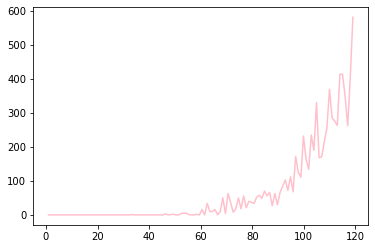

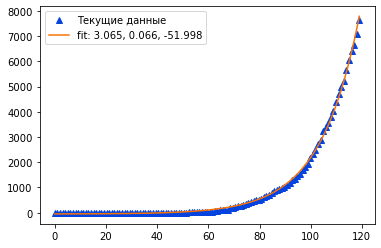

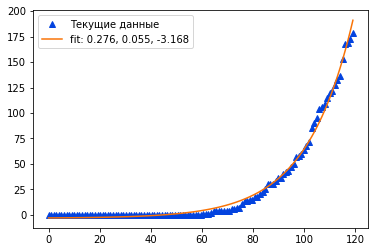

Albania


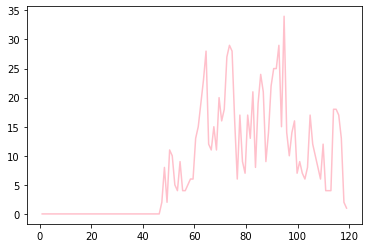

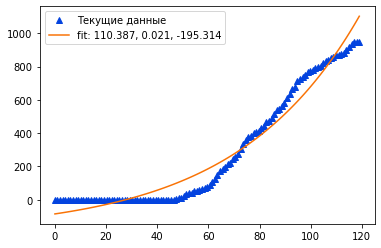

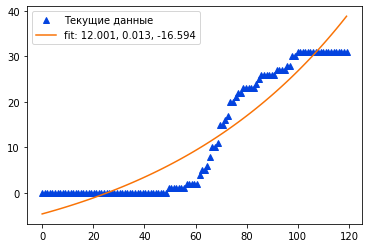

Algeria


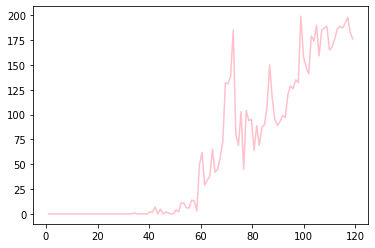

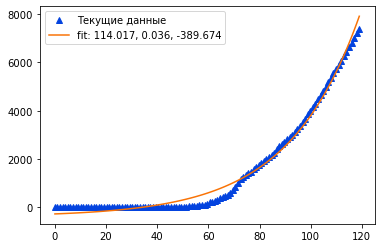

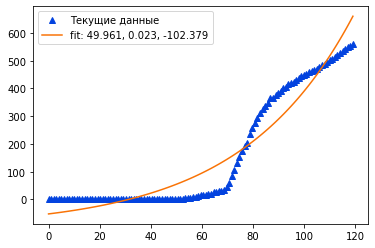

Andorra


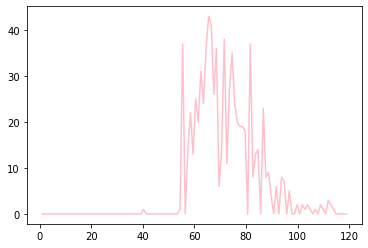

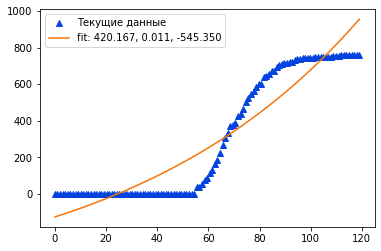

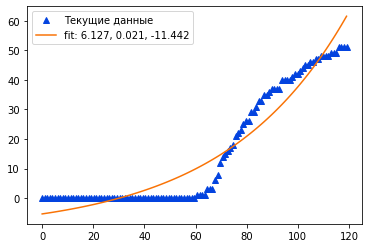

Angola


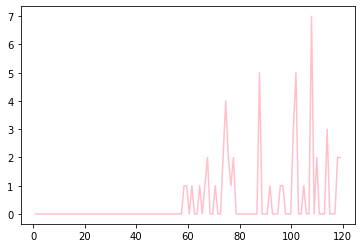

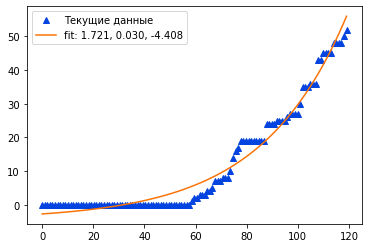

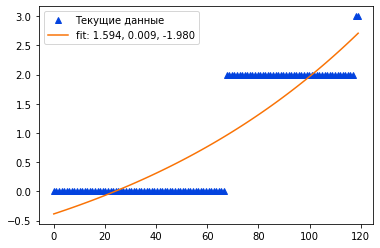

Antigua and Barbuda


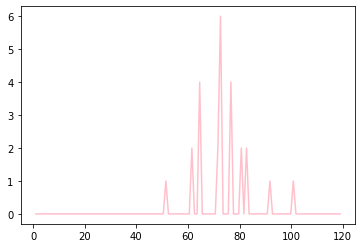

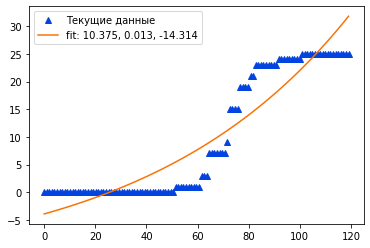

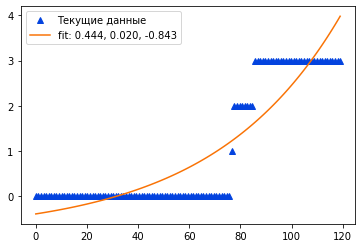

Argentina


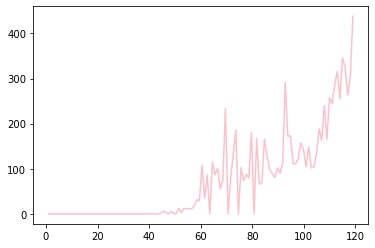

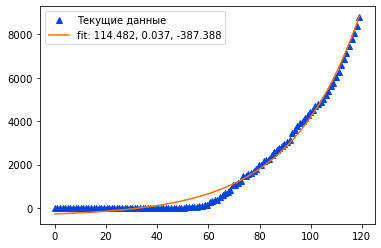

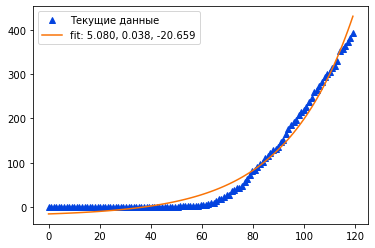

Armenia


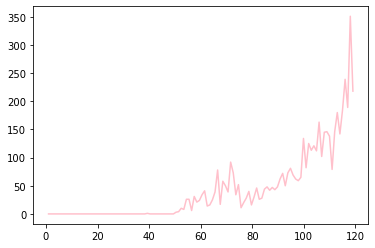

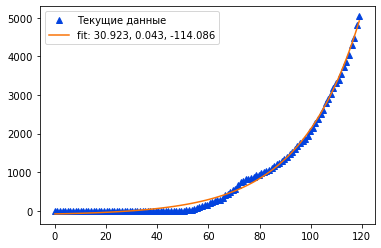

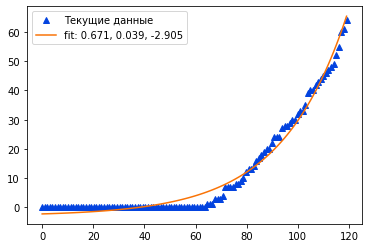

Australia


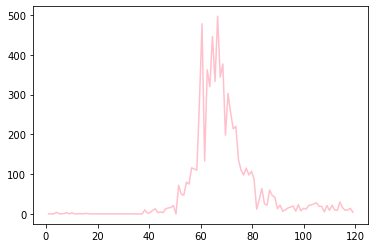

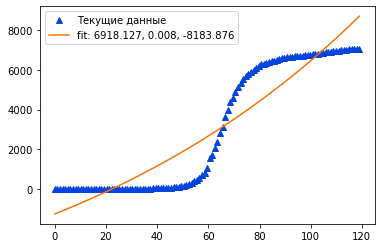

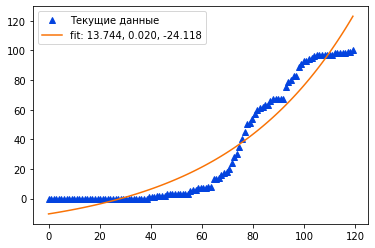

Austria


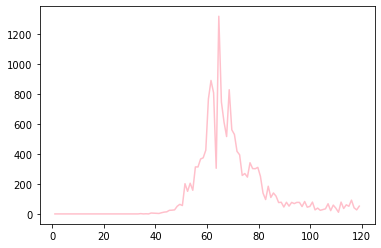

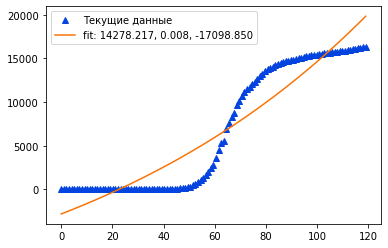

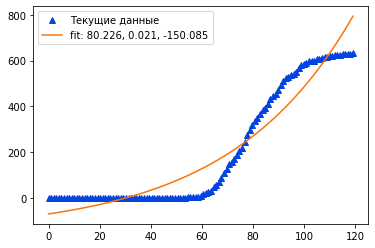

Azerbaijan


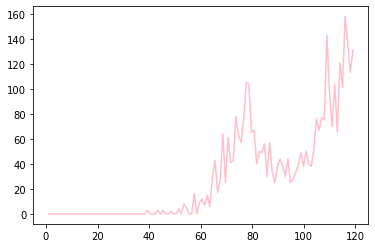

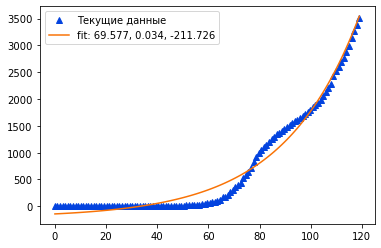

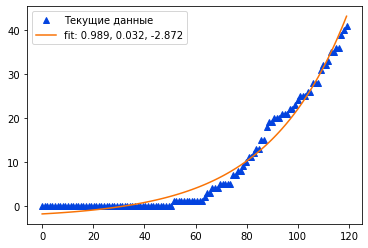

Bahamas


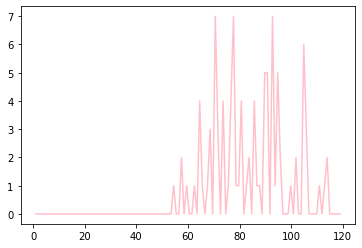

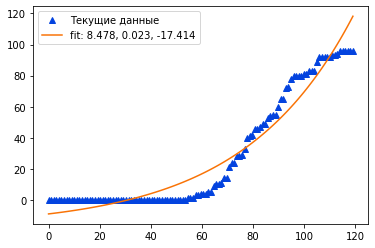

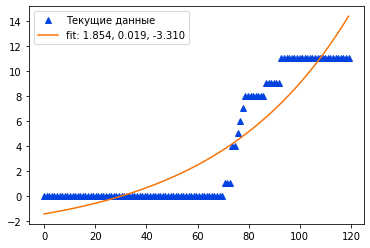

Bahrain


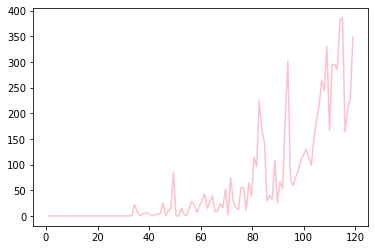

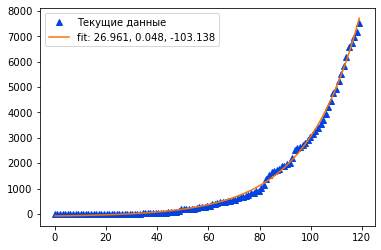

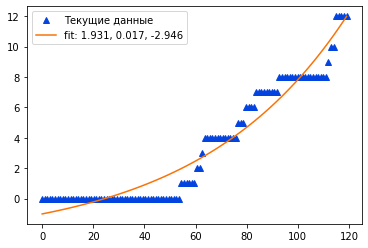

Bangladesh


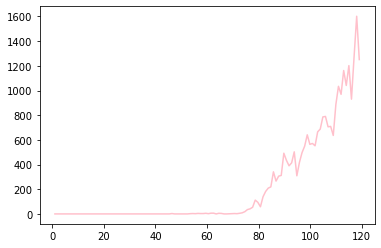

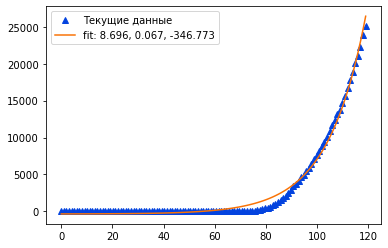

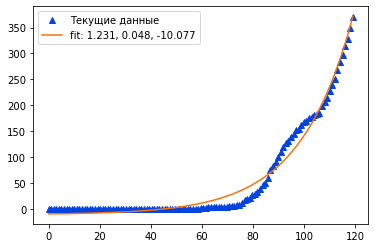

Barbados


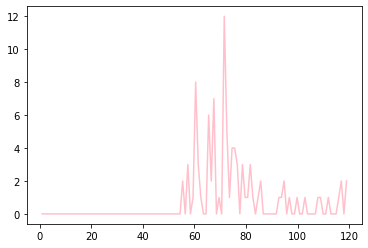

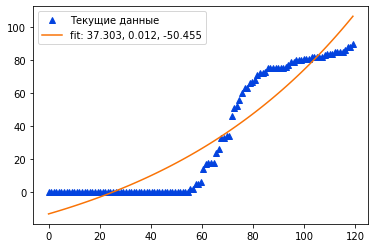

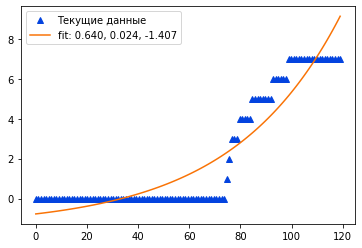

Belarus


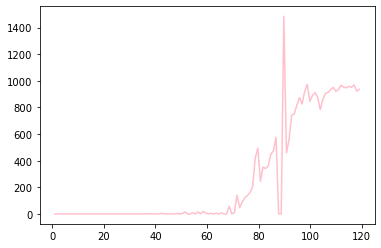

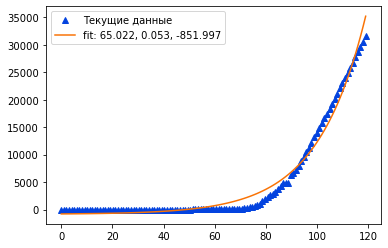

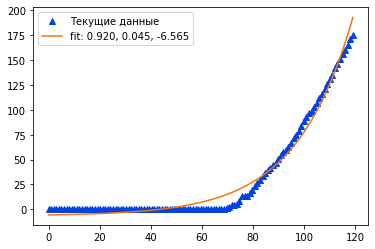

Belgium


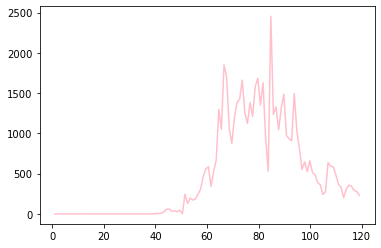

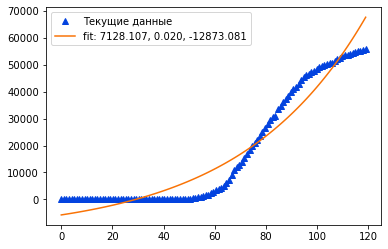

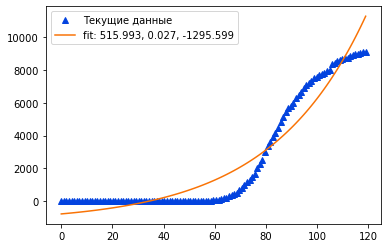

Benin


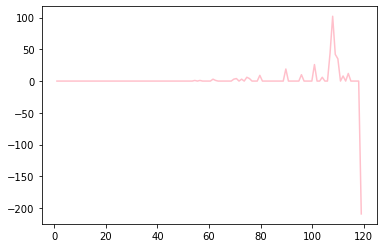

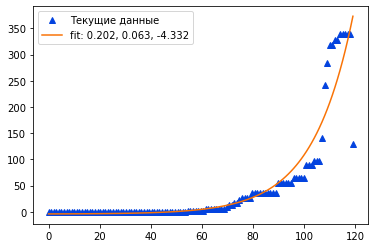

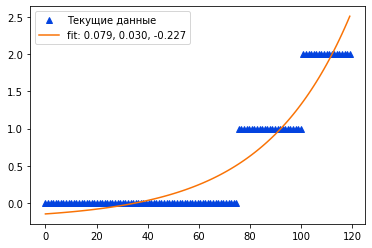

Bhutan


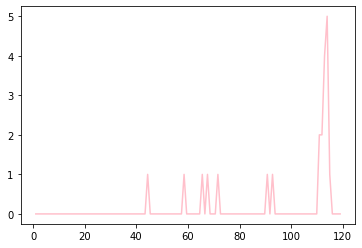

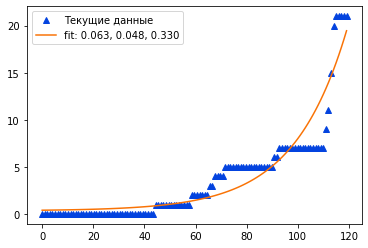

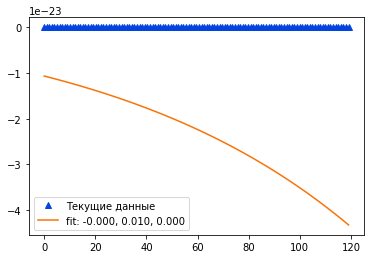

Bolivia


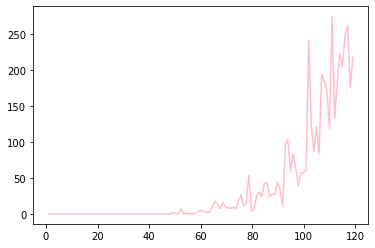

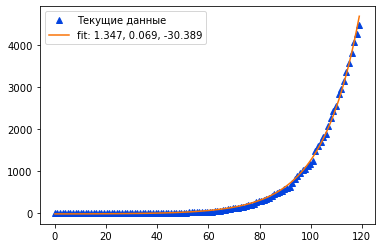

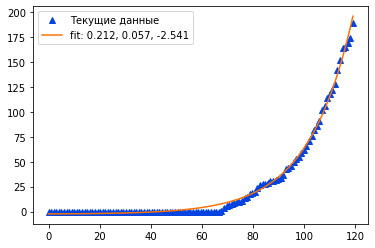

Bosnia and Herzegovina


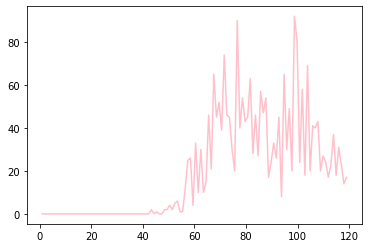

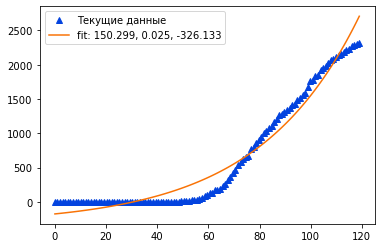

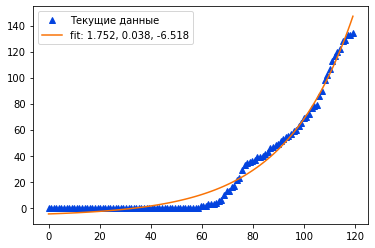

Brazil


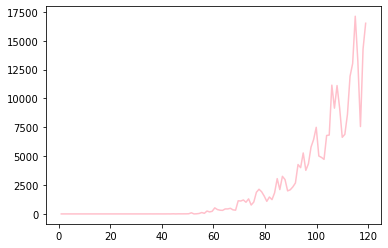

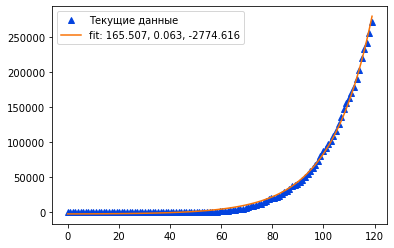

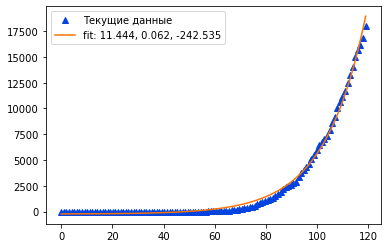

Brunei


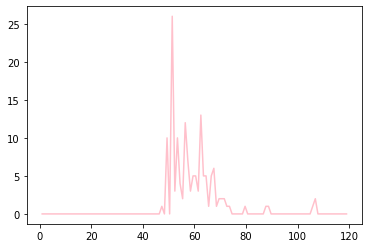

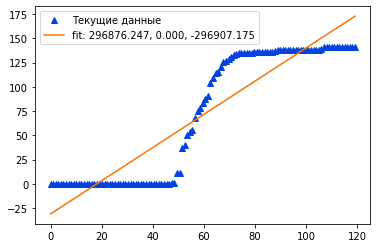

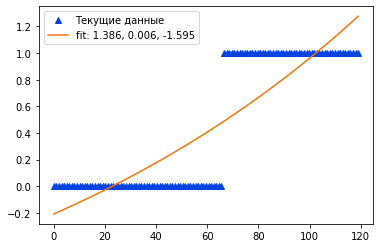

Bulgaria


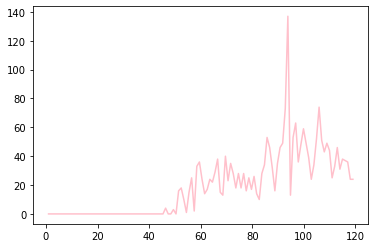

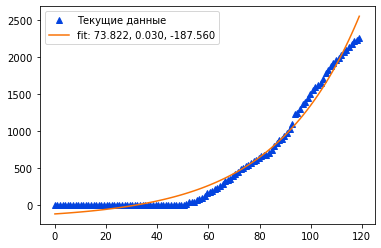

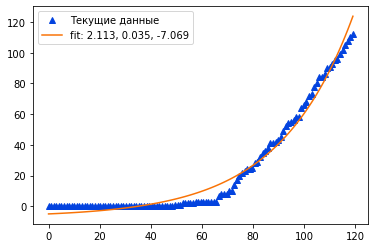

Burkina Faso


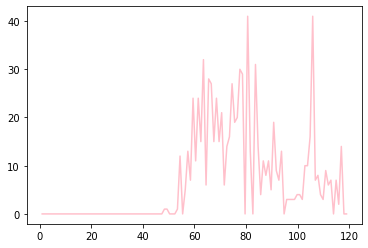

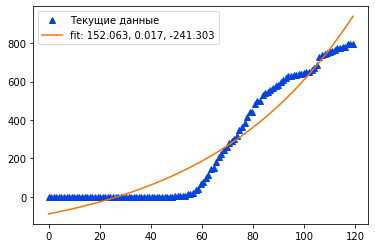

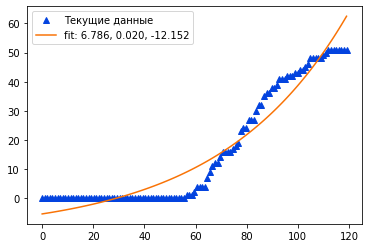

Cabo Verde


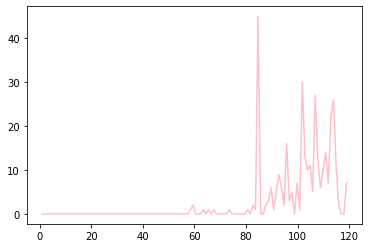

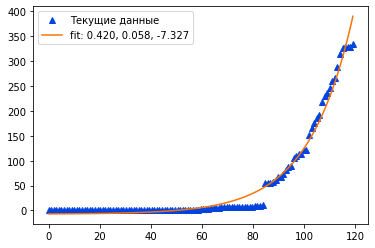

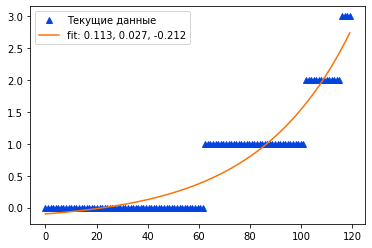

Cambodia


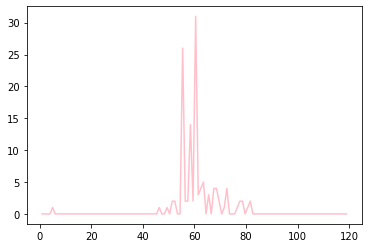

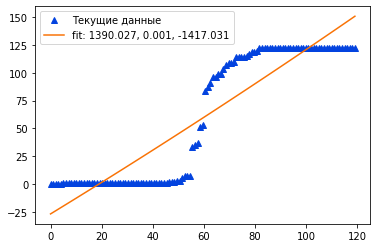

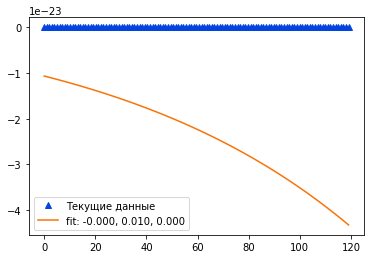

Cameroon


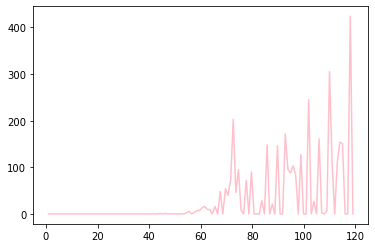

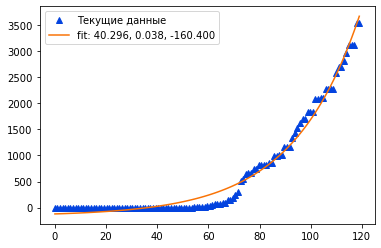

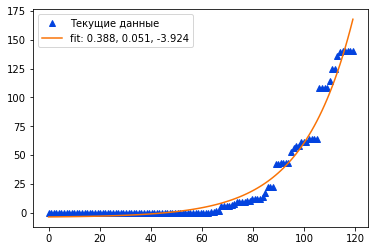

Canada


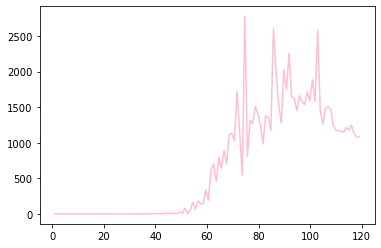

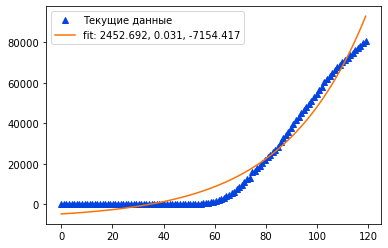

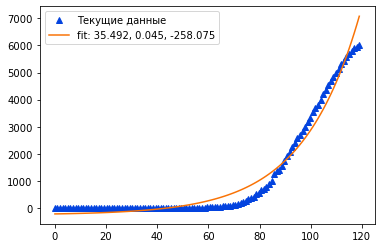

Central African Republic


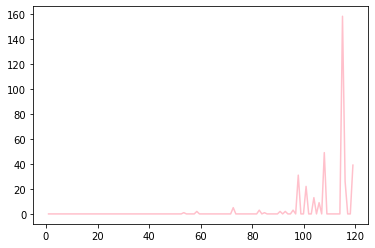

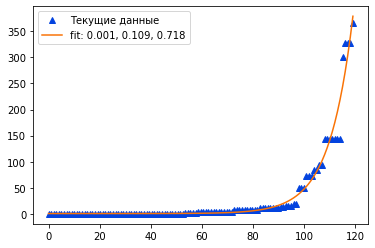

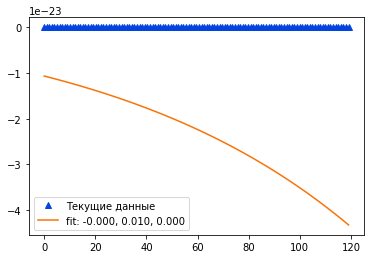

Chad


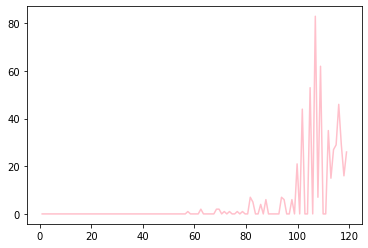

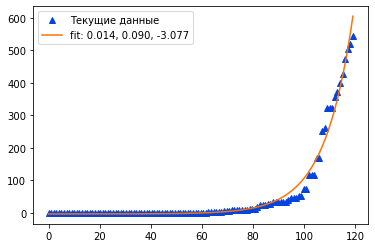

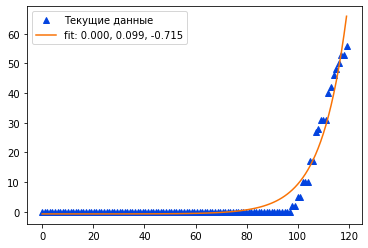

Chile


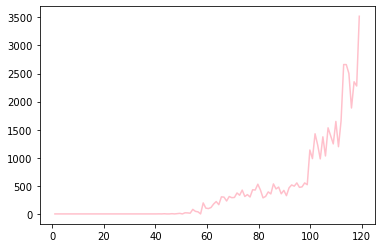

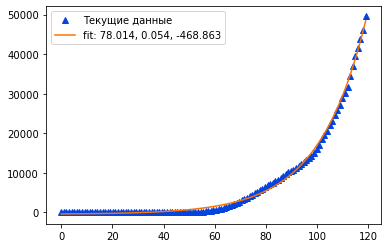

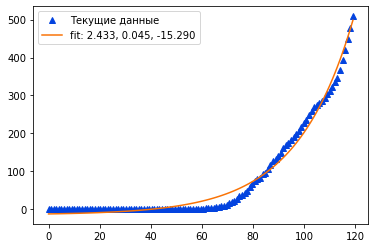

China


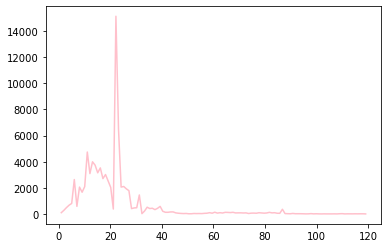

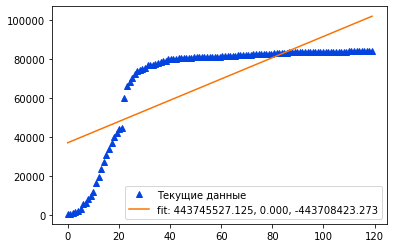

c:\users\супемэн\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


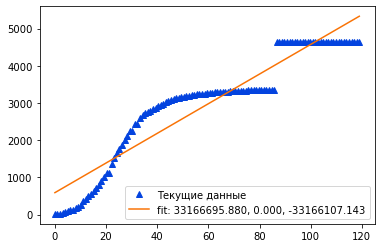

Colombia


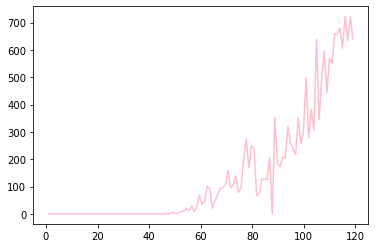

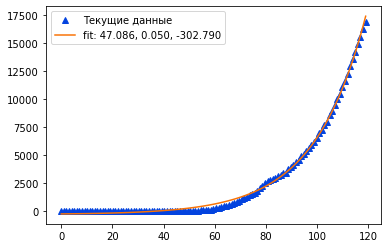

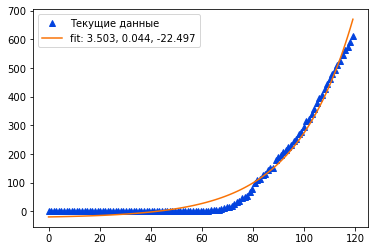

Congo (Brazzaville)


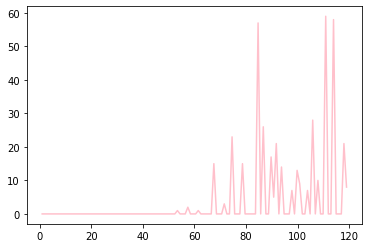

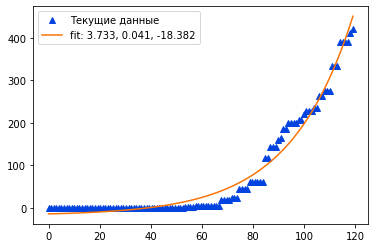

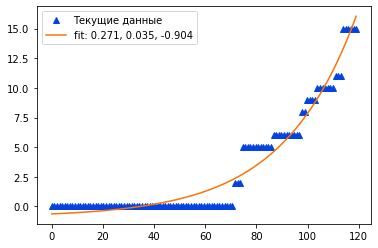

Congo (Kinshasa)


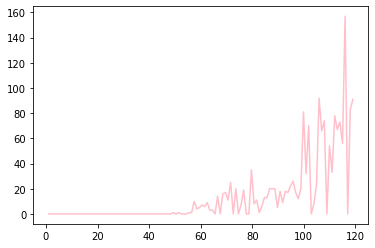

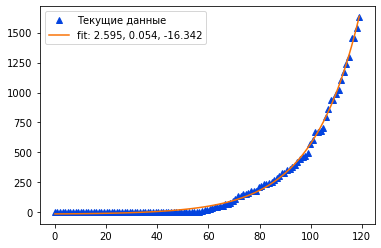

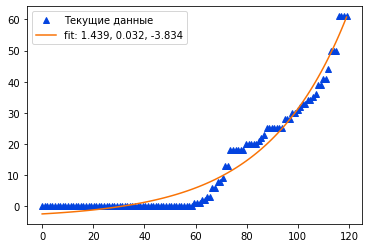

Costa Rica


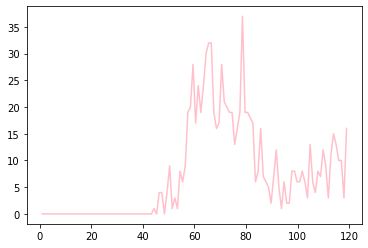

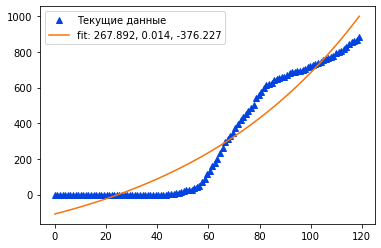

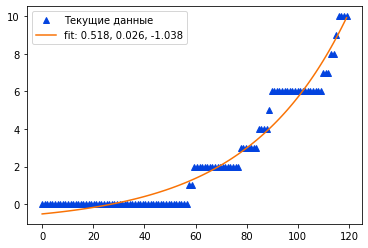

Cote d'Ivoire


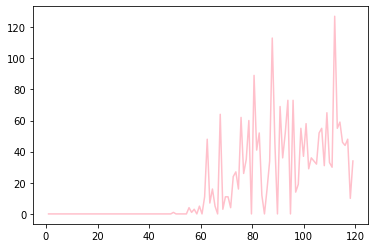

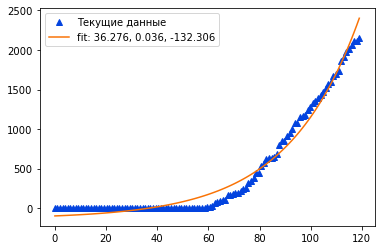

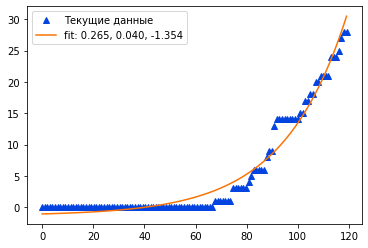

Croatia


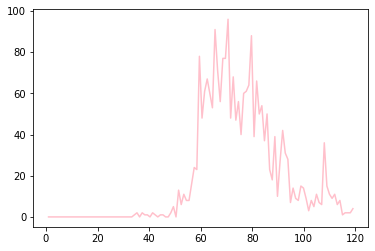

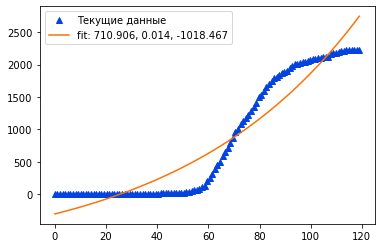

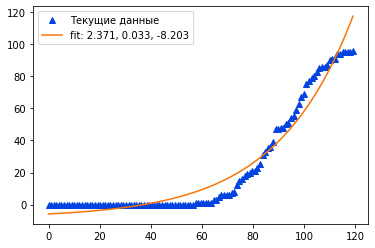

Diamond Princess


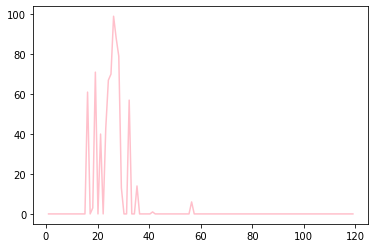

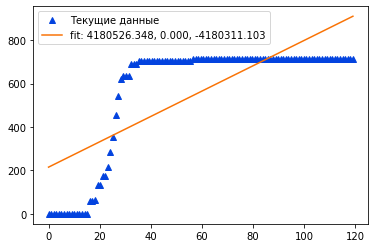

c:\users\супемэн\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


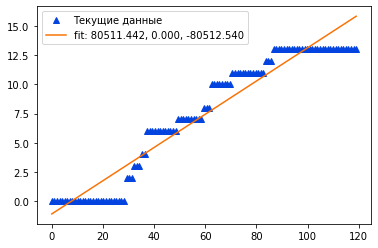

Cuba


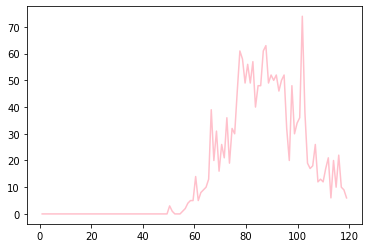

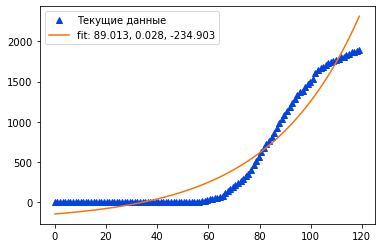

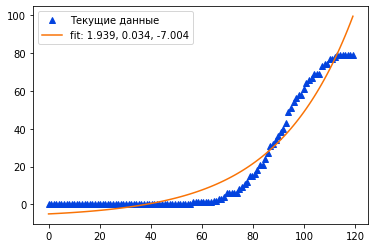

Cyprus


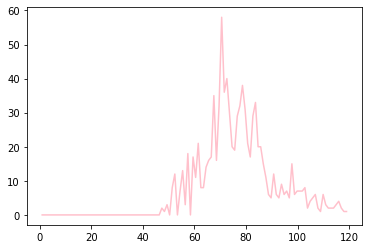

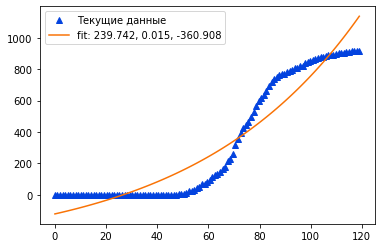

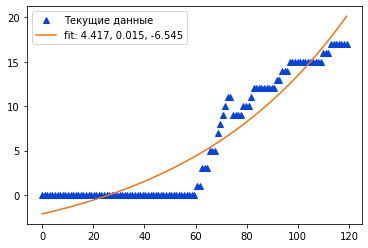

Czechia


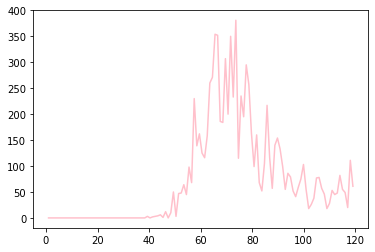

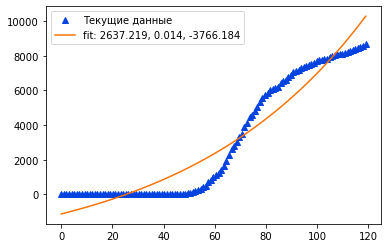

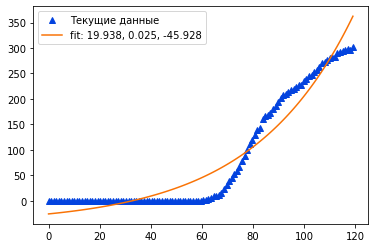

Denmark


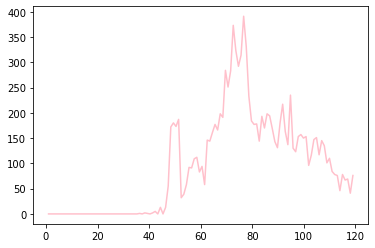

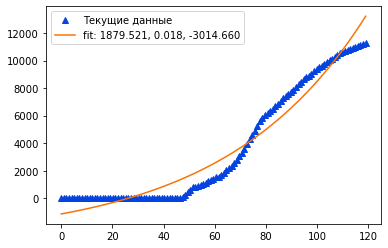

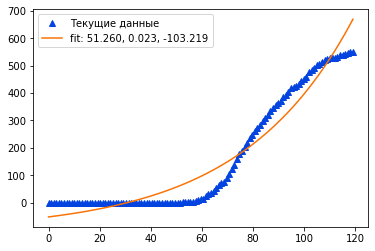

Djibouti


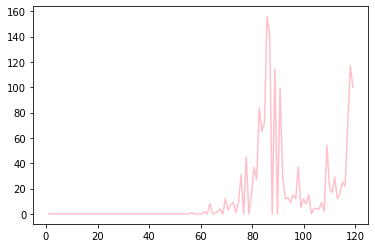

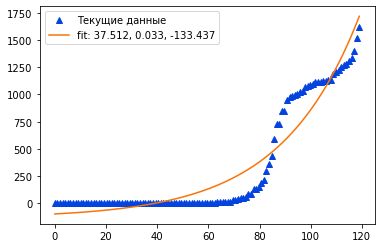

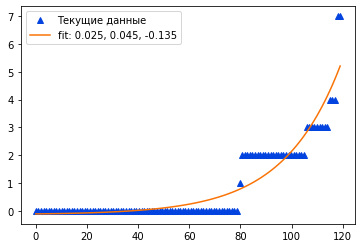

Dominican Republic


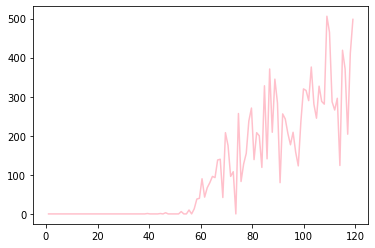

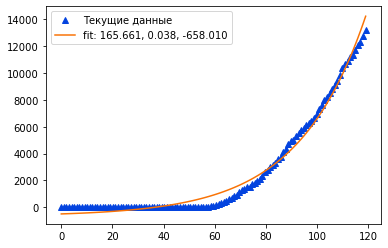

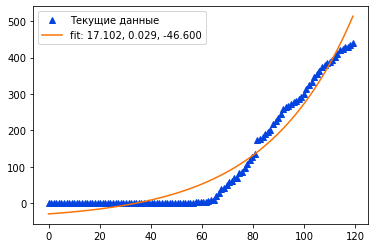

Ecuador


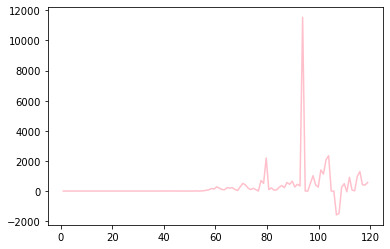

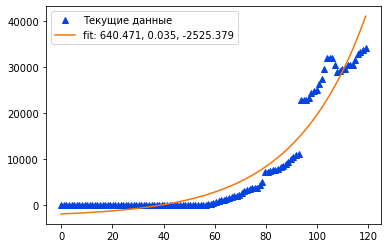

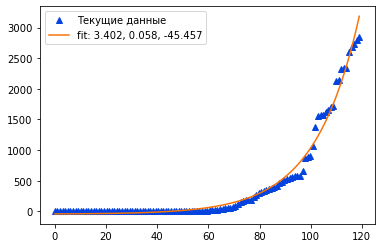

Egypt


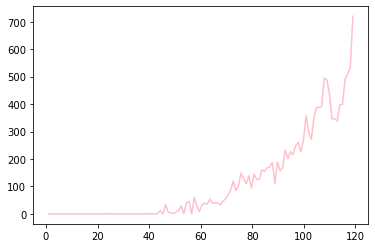

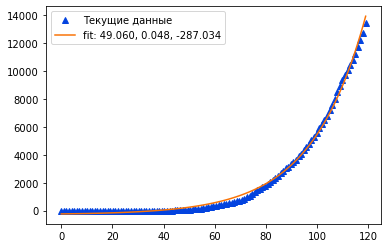

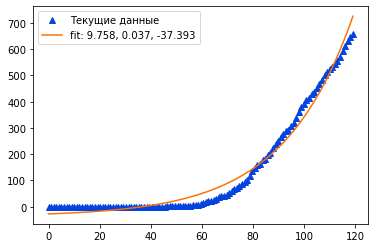

El Salvador


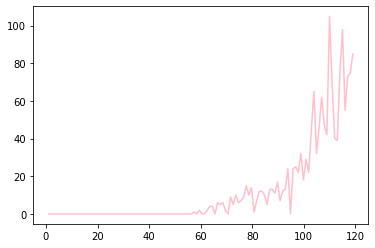

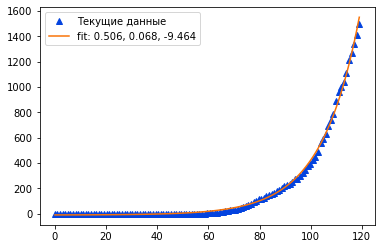

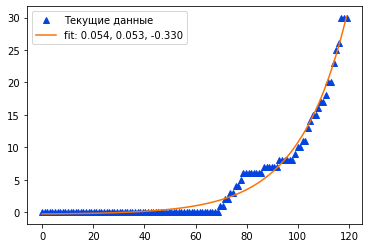

Equatorial Guinea


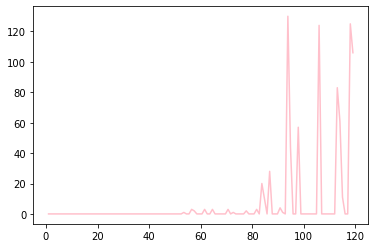

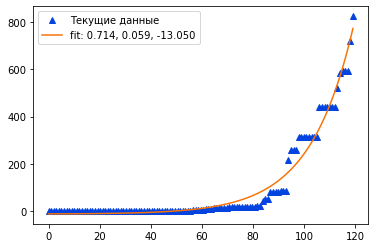

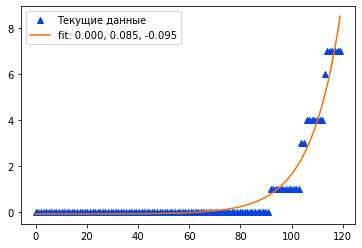

Eritrea


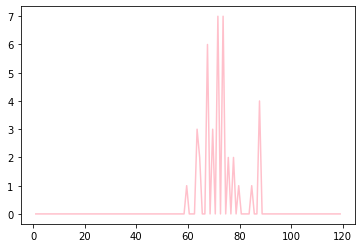

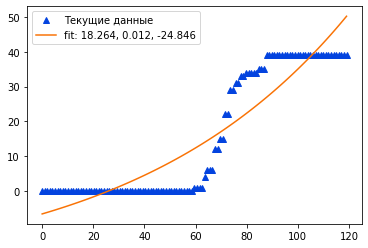

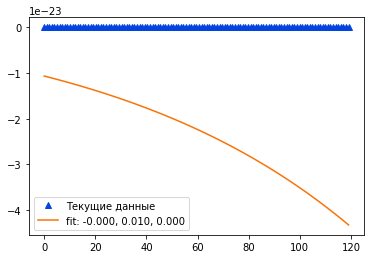

Estonia


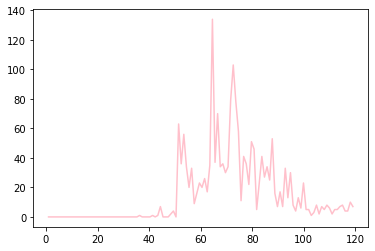

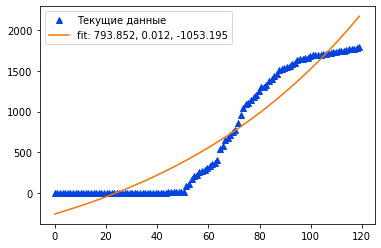

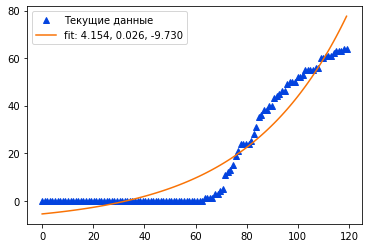

Eswatini


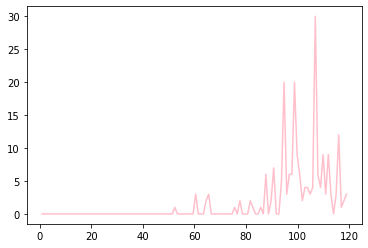

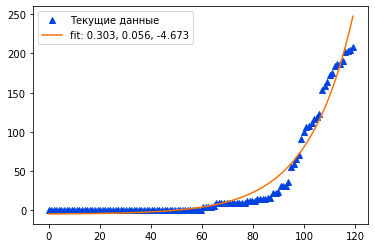

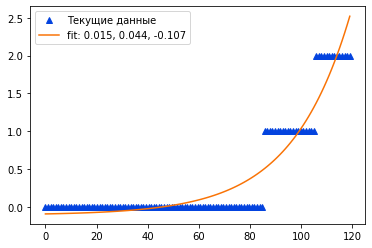

Ethiopia


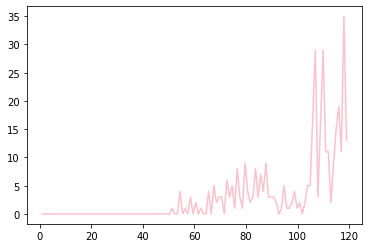

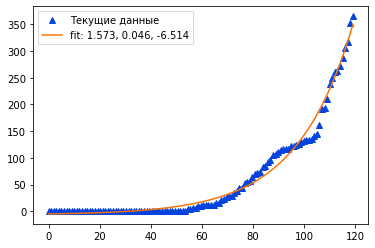

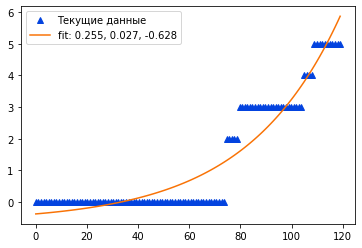

Fiji


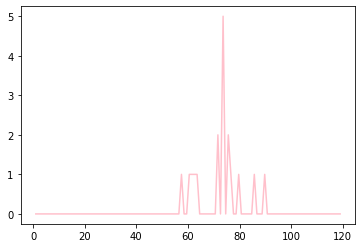

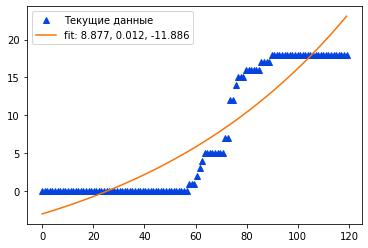

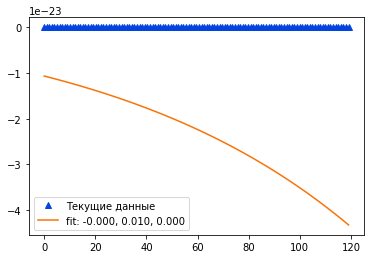

Finland


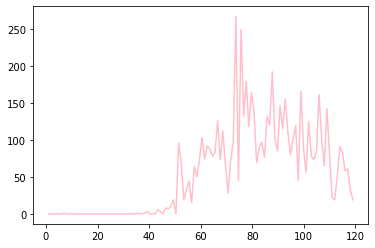

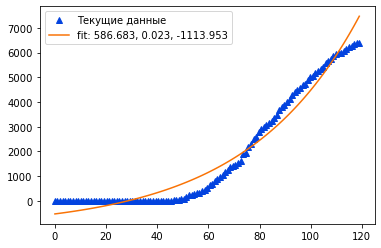

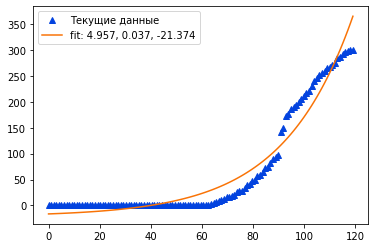

France


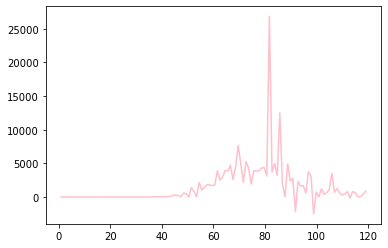

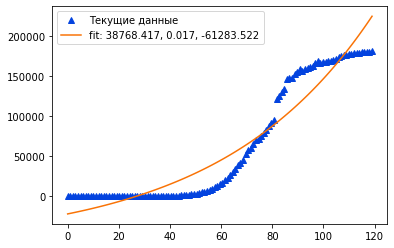

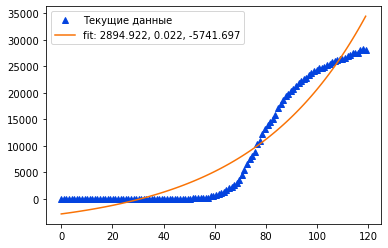

Gabon


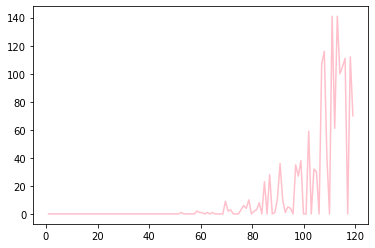

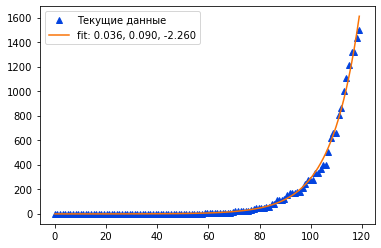

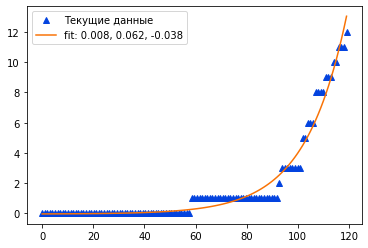

Gambia


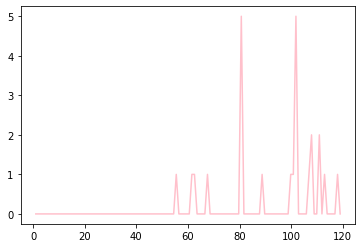

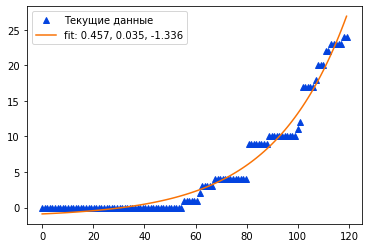

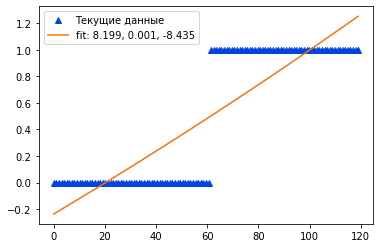

Georgia


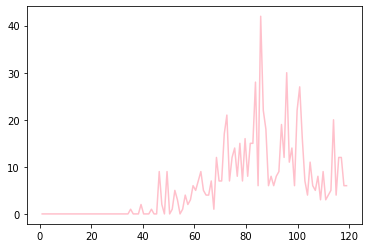

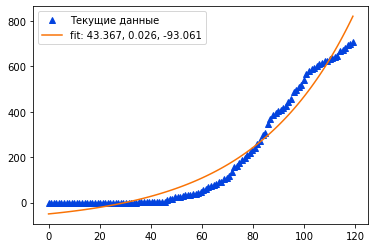

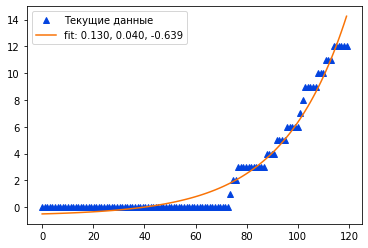

Germany


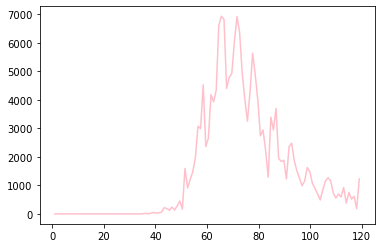

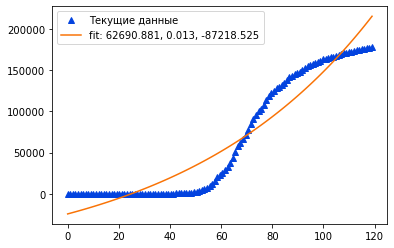

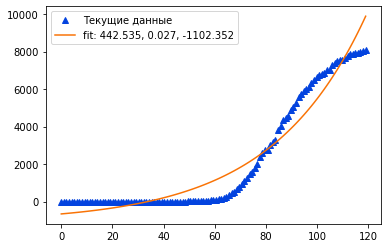

Ghana


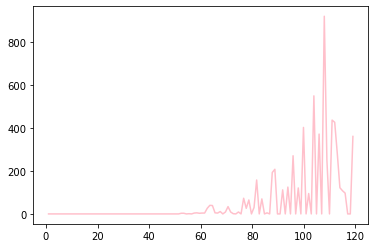

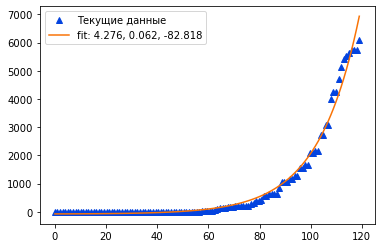

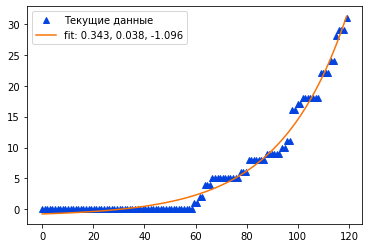

Greece


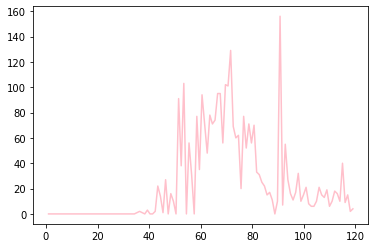

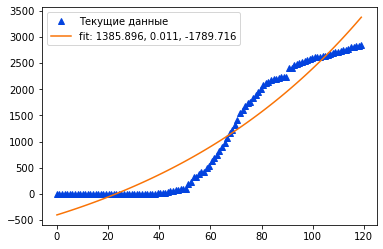

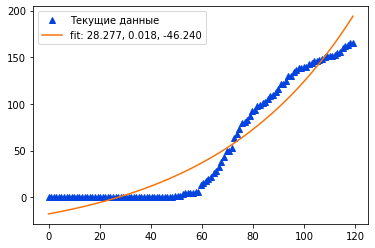

Guatemala


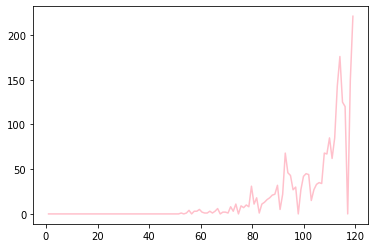

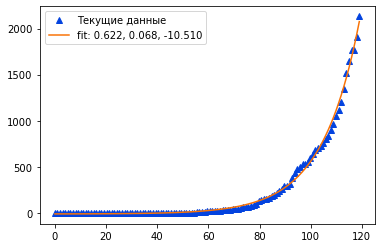

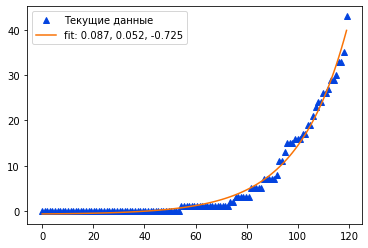

Guinea


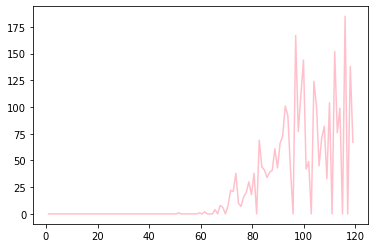

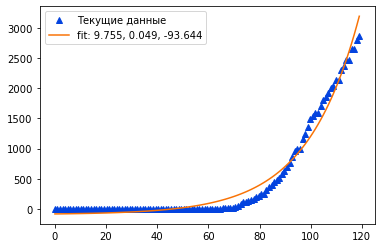

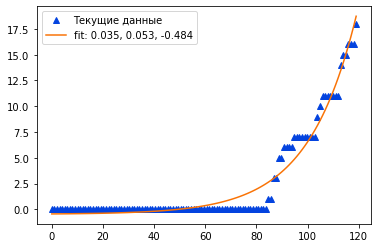

Guyana


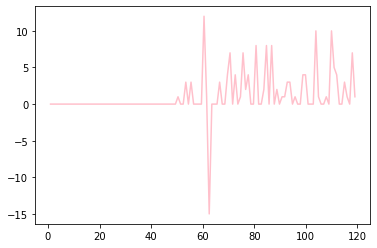

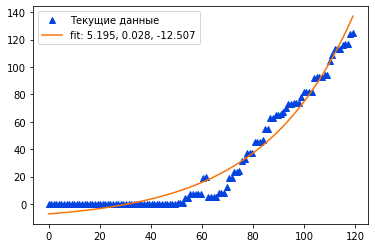

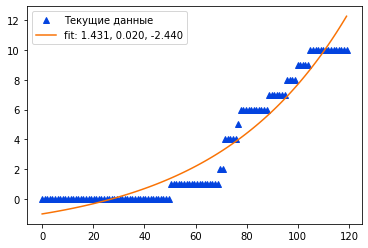

Haiti


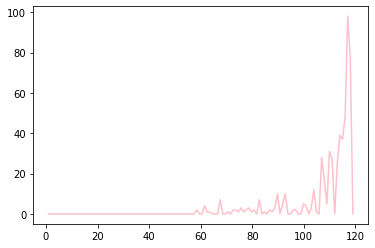

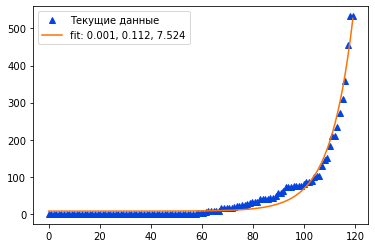

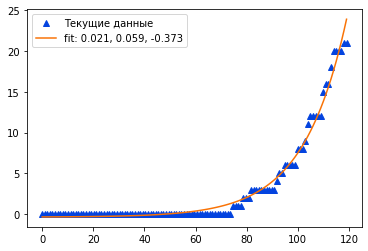

Holy See


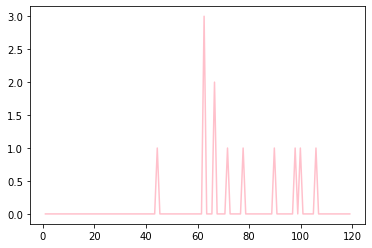

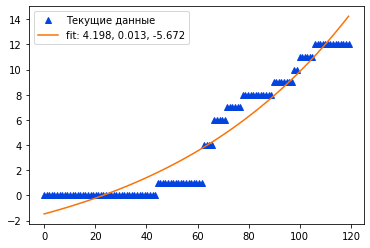

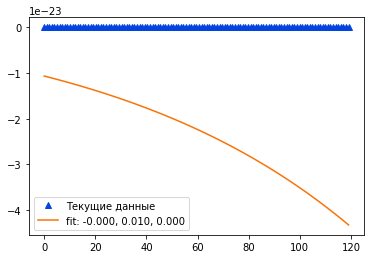

Honduras


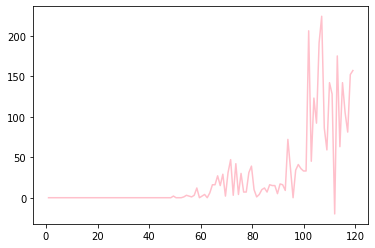

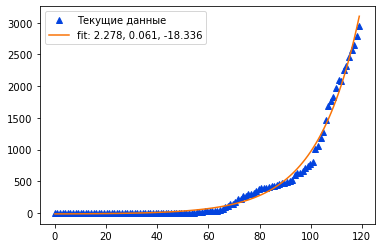

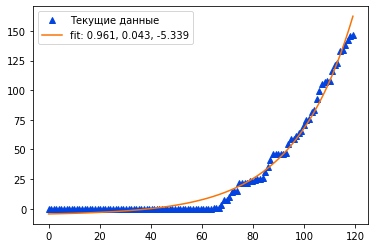

Hungary


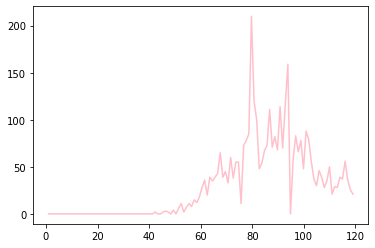

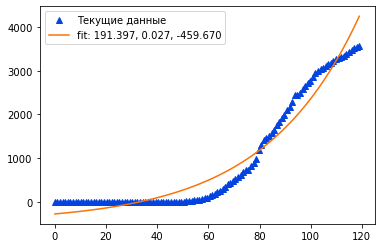

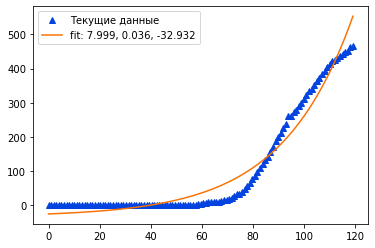

Iceland


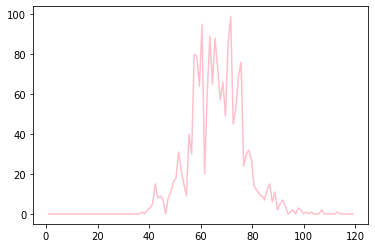

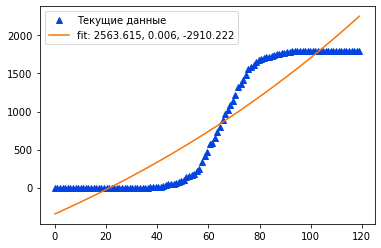

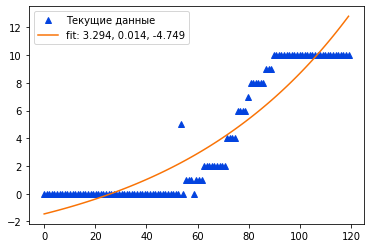

India


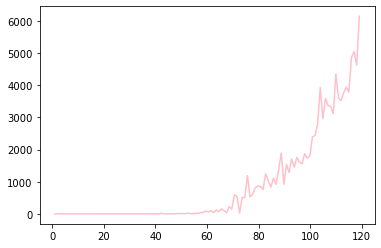

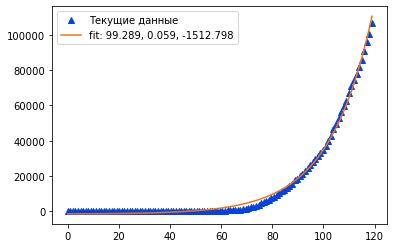

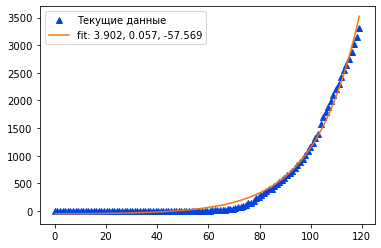

Indonesia


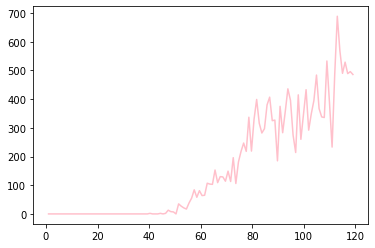

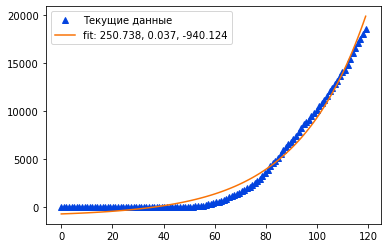

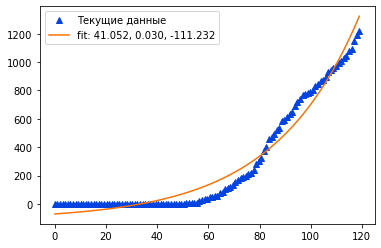

Iran


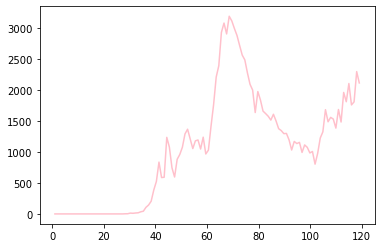

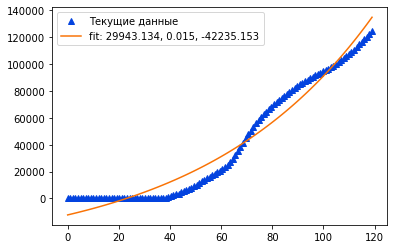

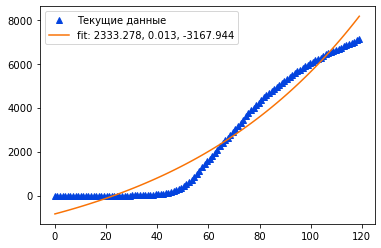

Iraq


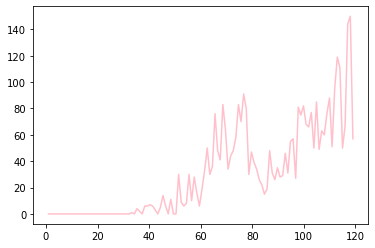

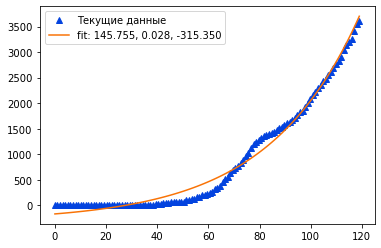

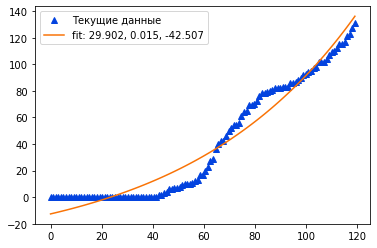

Ireland


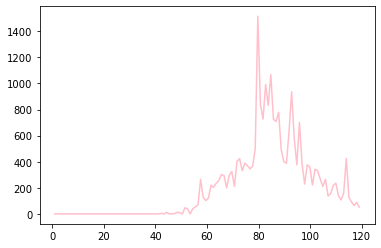

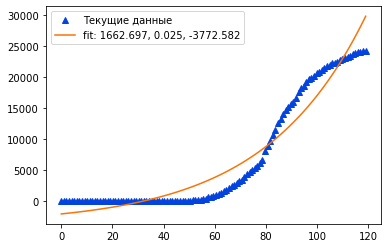

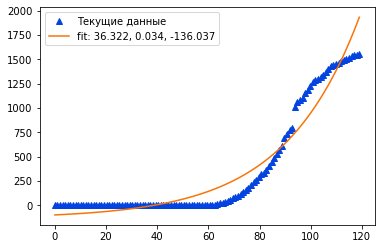

Israel


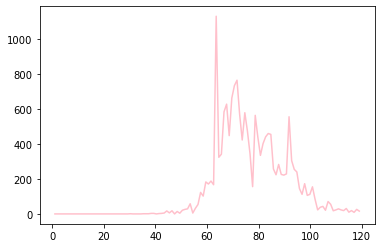

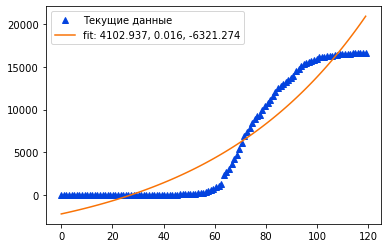

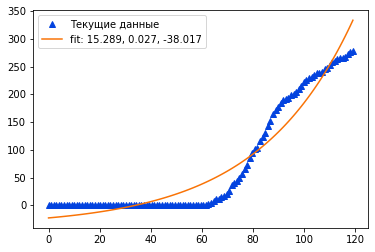

Italy


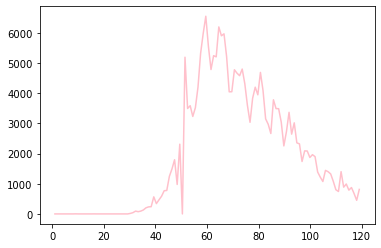

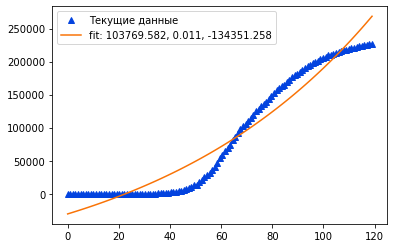

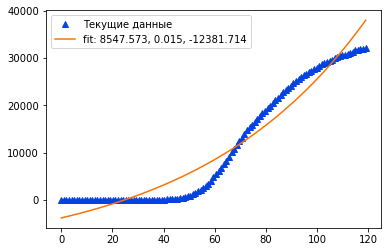

Jamaica


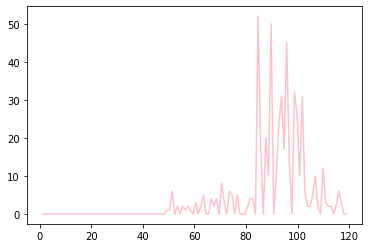

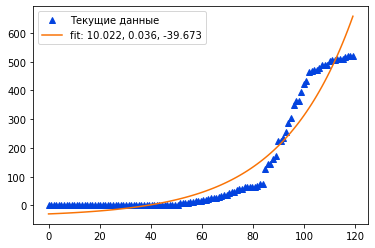

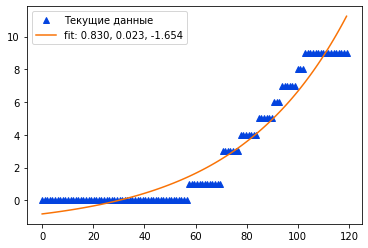

Japan


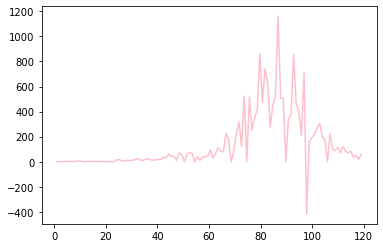

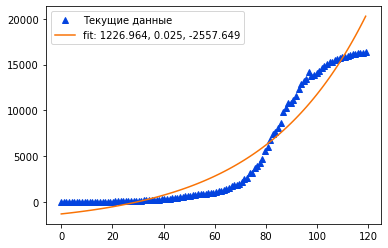

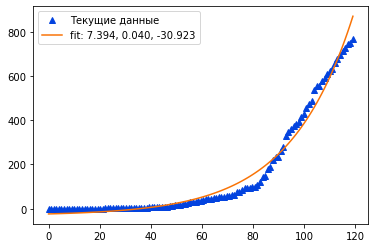

Jordan


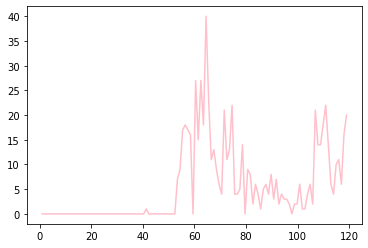

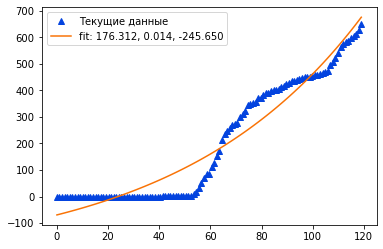

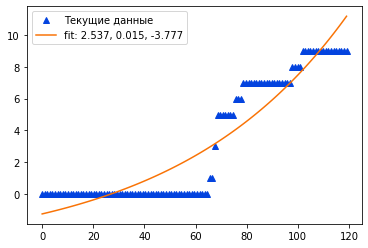

Kazakhstan


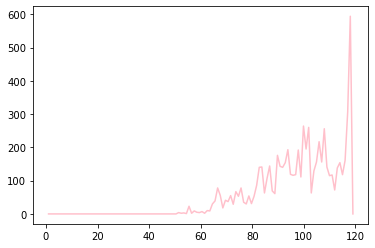

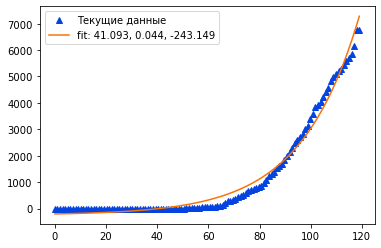

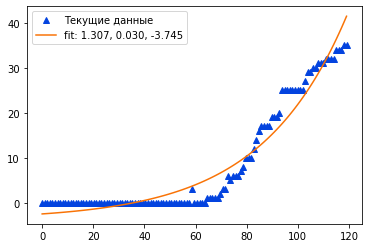

Kenya


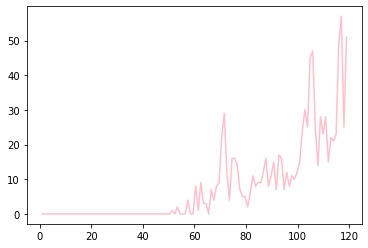

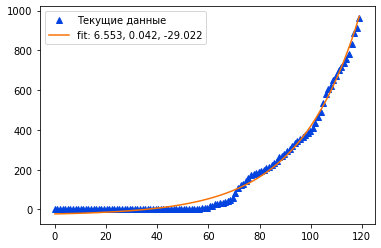

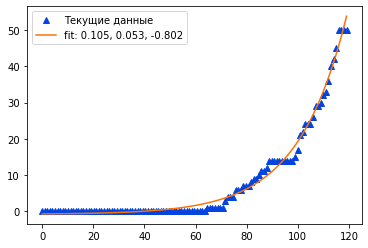

Korea, South


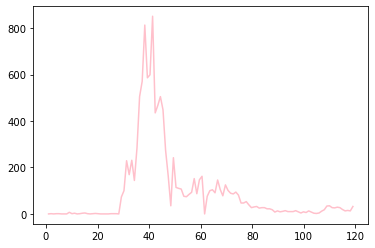

c:\users\супемэн\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


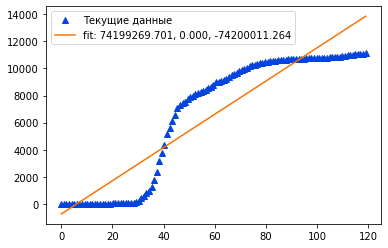

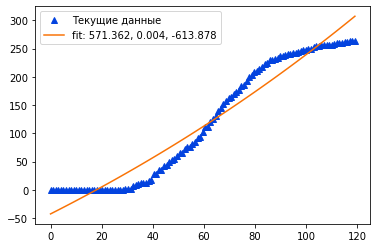

Kuwait


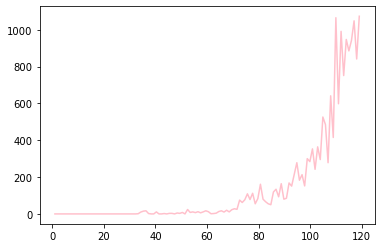

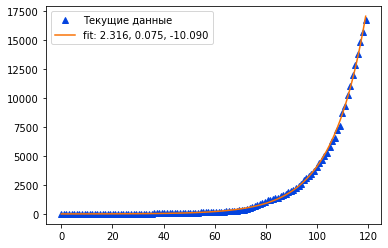

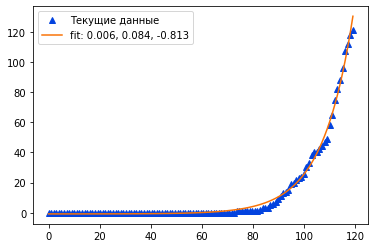

Kyrgyzstan


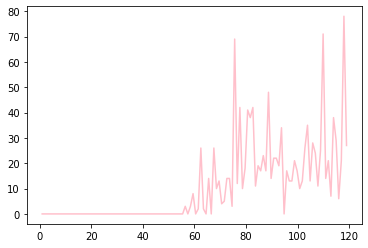

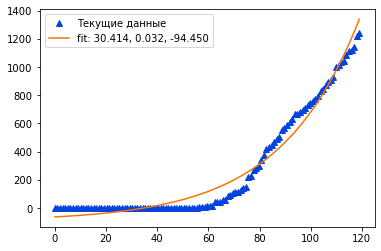

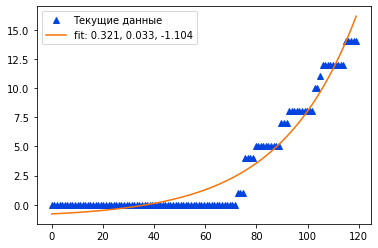

Latvia


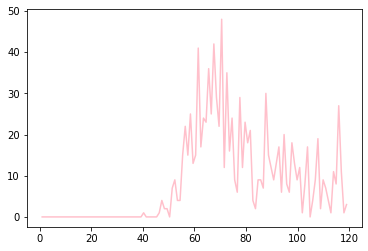

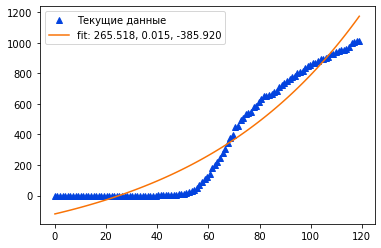

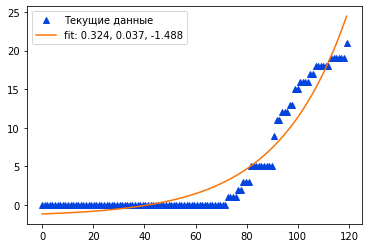

Lebanon


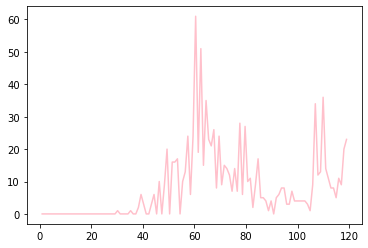

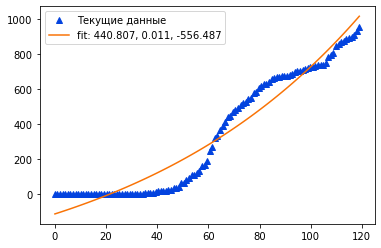

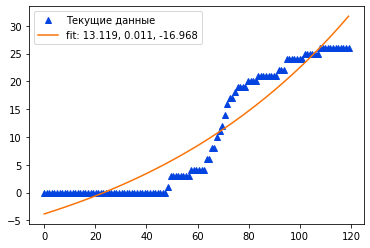

Liberia


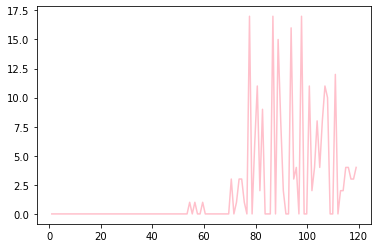

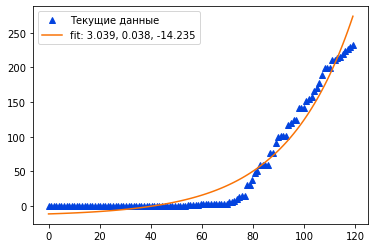

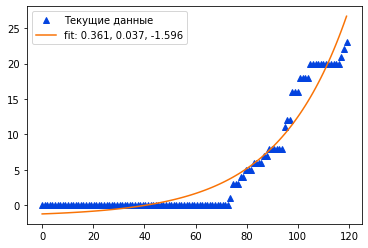

Liechtenstein


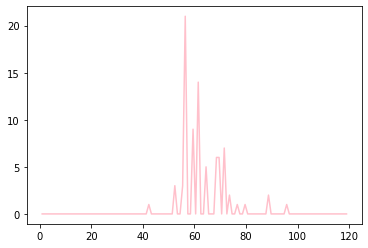

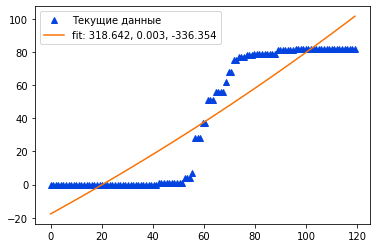

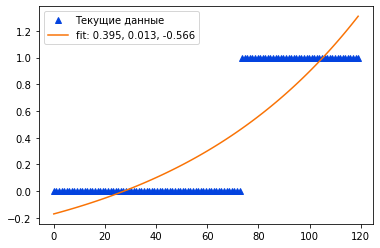

Lithuania


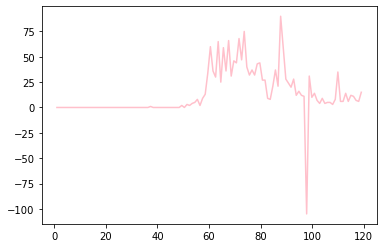

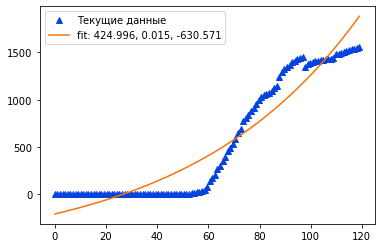

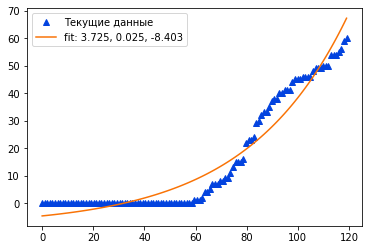

Luxembourg


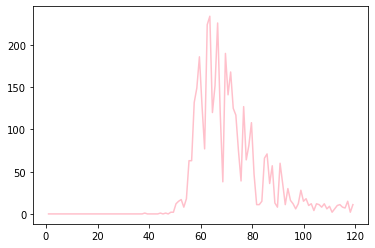

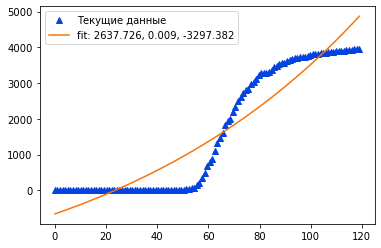

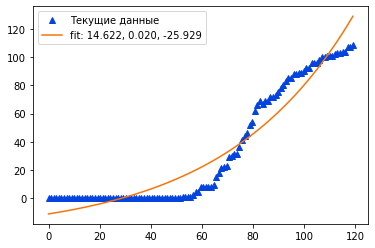

Madagascar


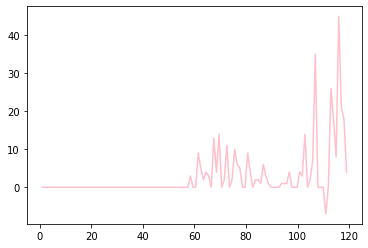

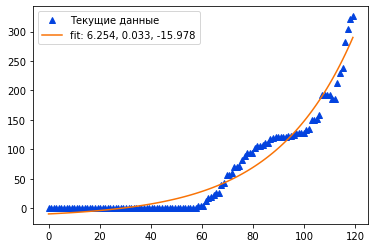

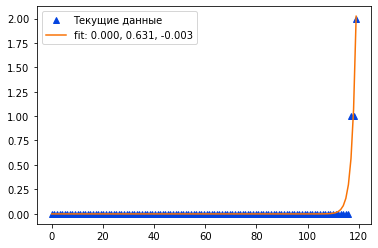

Malaysia


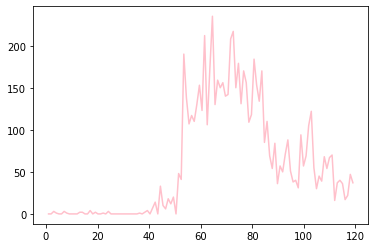

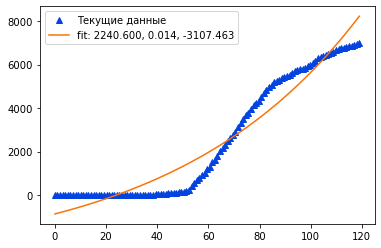

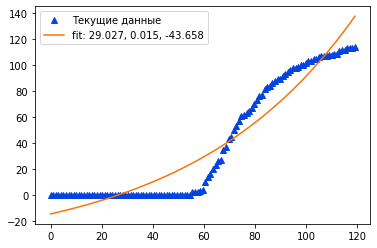

Maldives


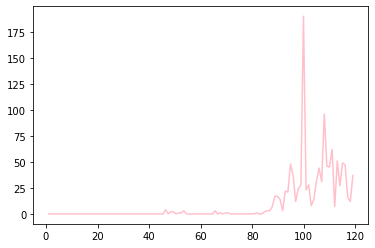

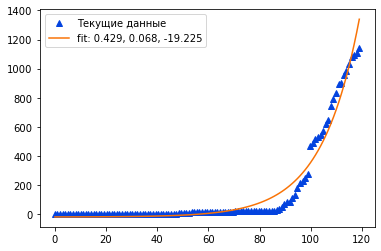

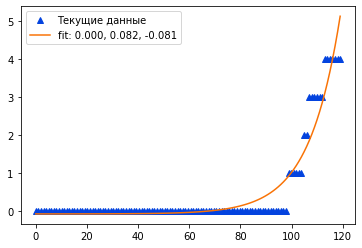

Malta


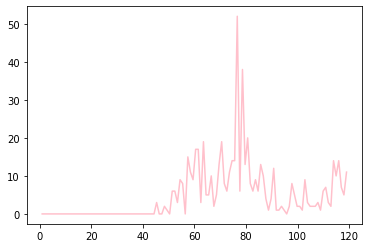

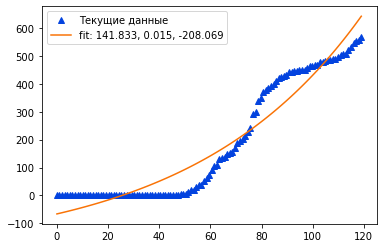

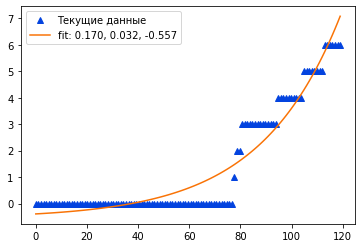

Mauritania


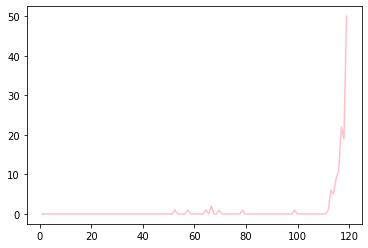

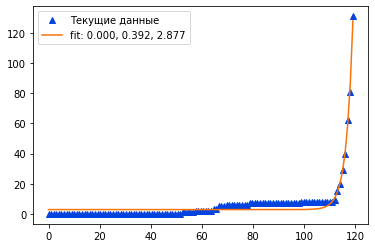

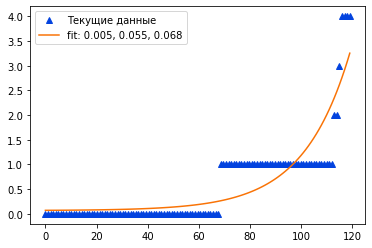

Mauritius


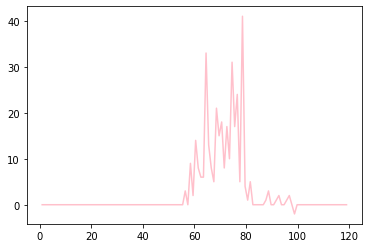

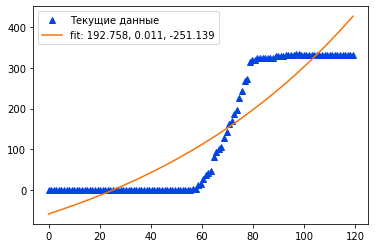

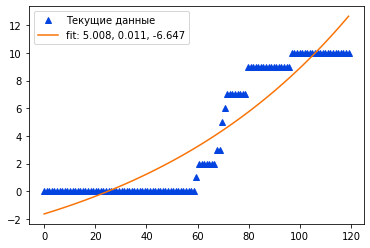

Mexico


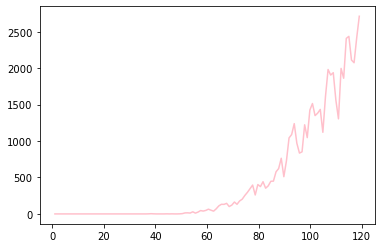

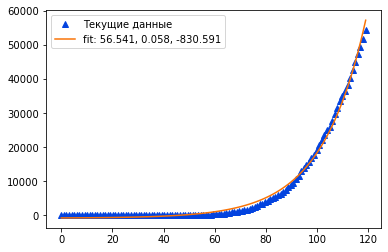

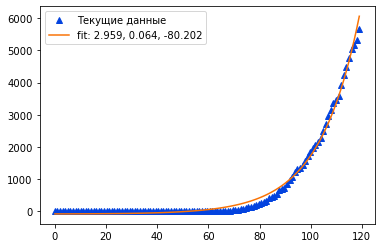

Moldova


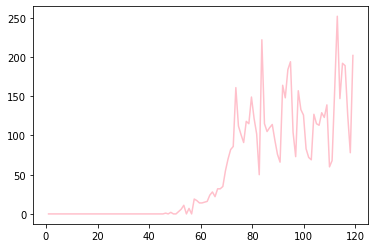

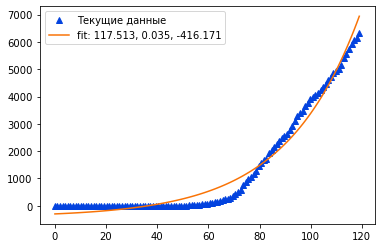

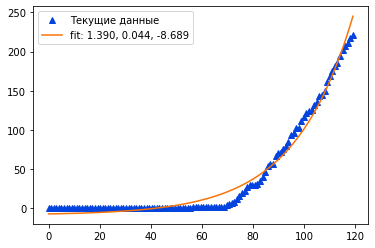

Monaco


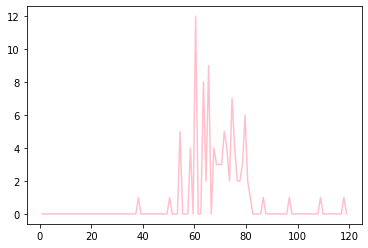

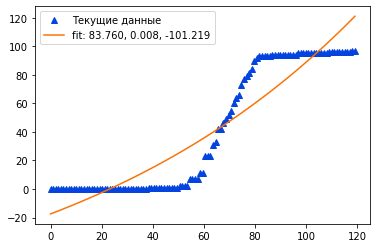

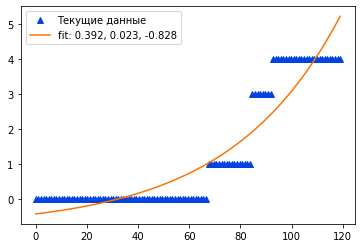

Mongolia


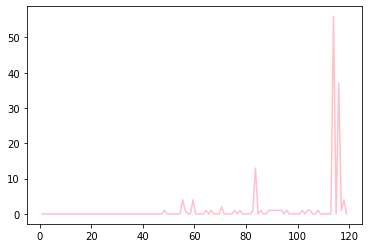

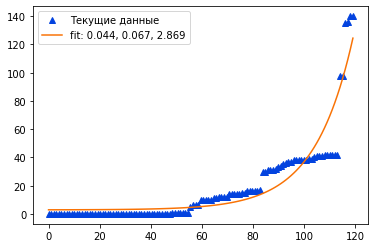

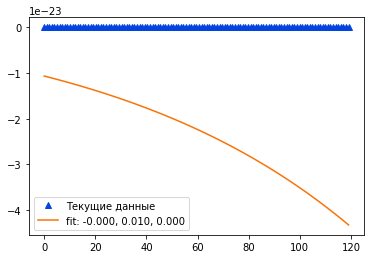

Montenegro


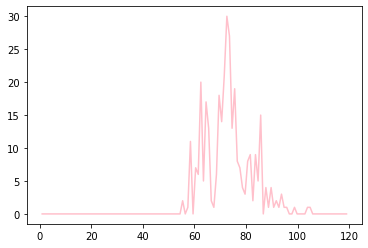

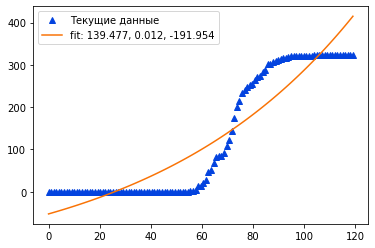

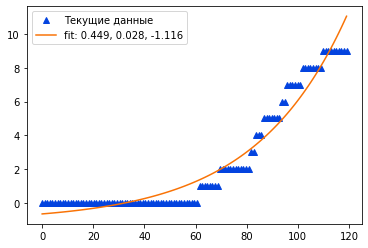

Morocco


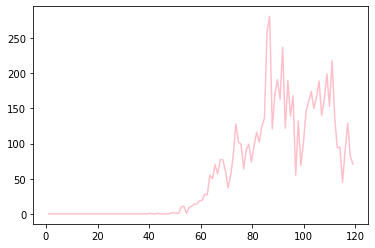

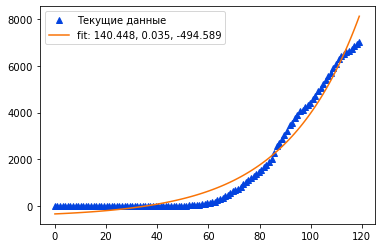

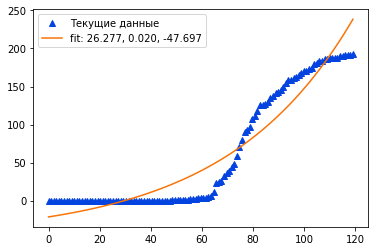

Namibia


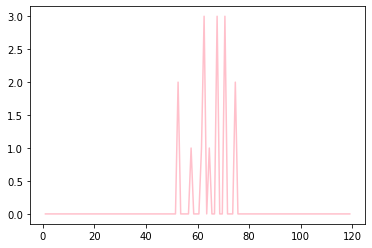

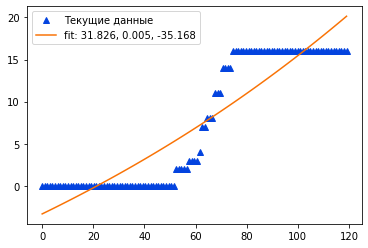

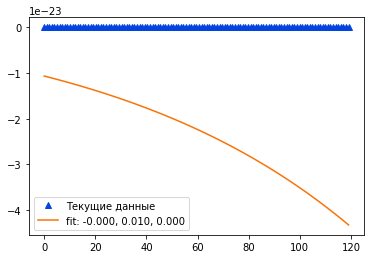

Nepal


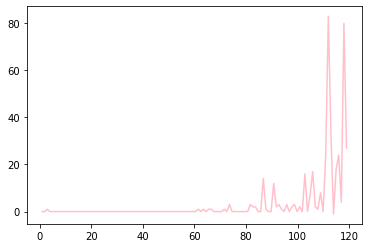

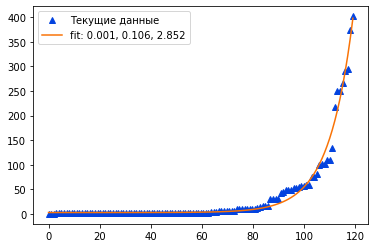

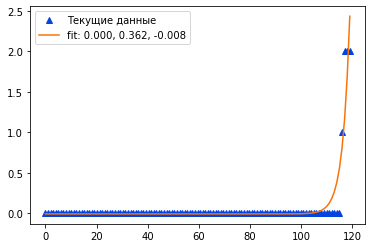

Netherlands


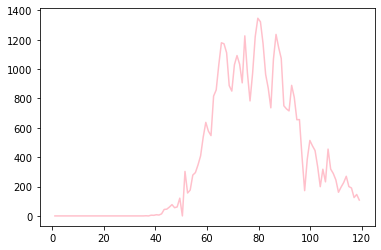

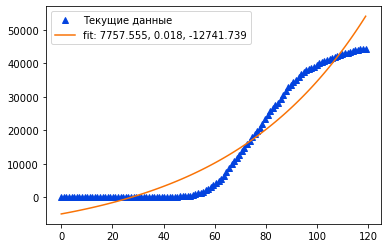

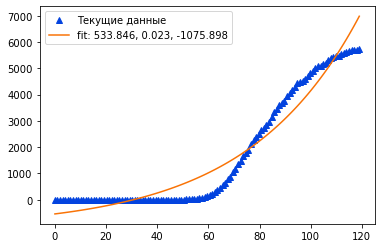

New Zealand


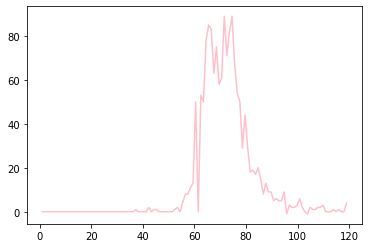

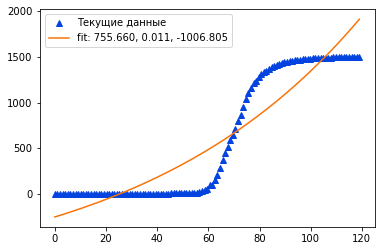

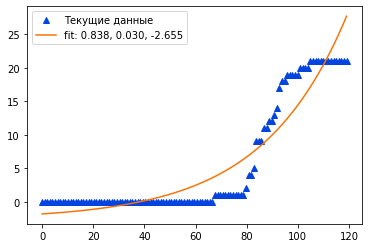

Nicaragua


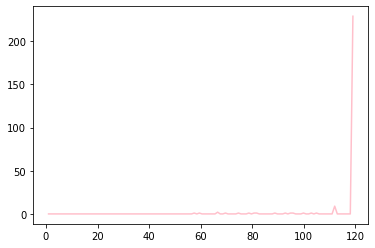

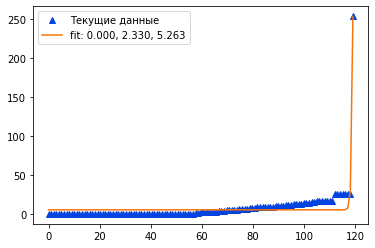

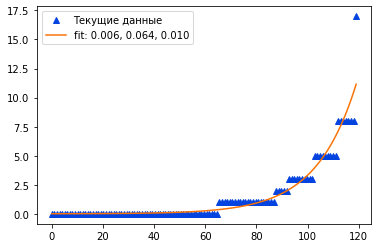

Niger


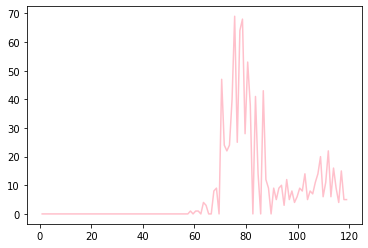

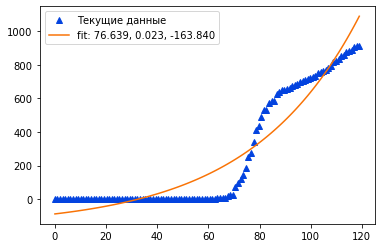

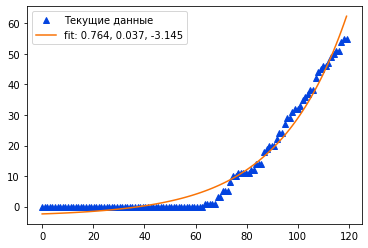

Nigeria


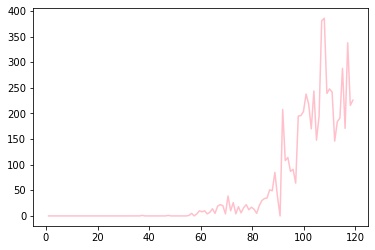

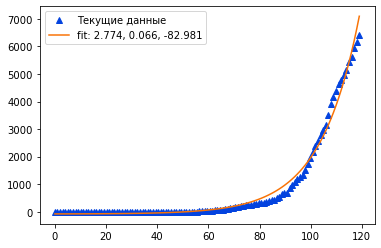

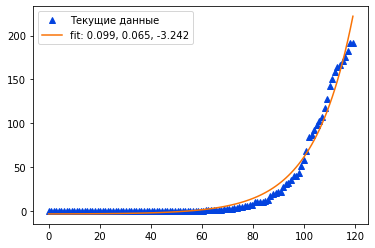

North Macedonia


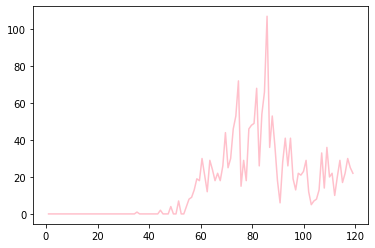

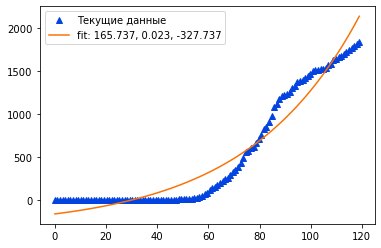

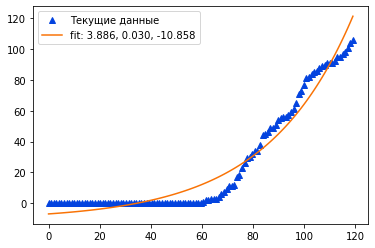

Norway


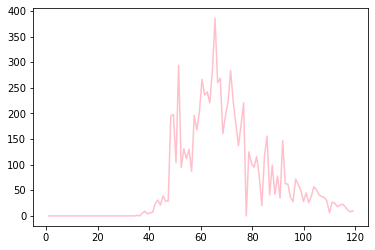

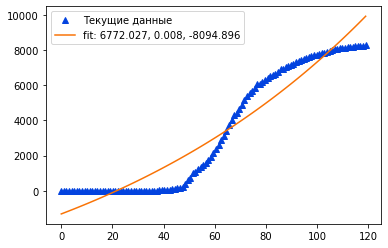

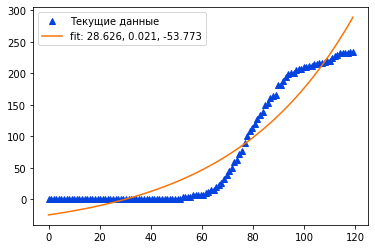

Oman


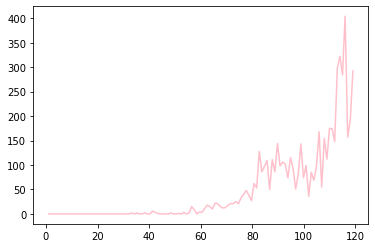

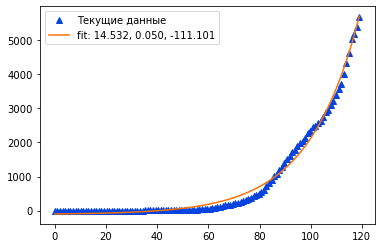

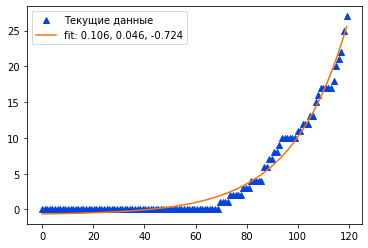

Pakistan


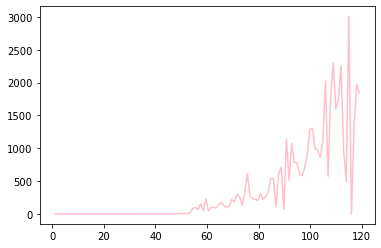

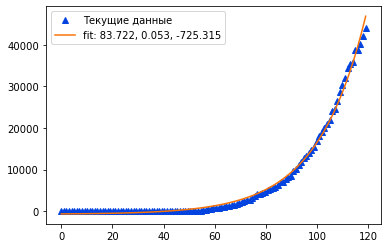

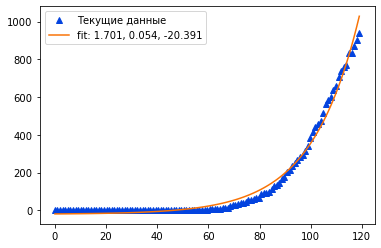

Panama


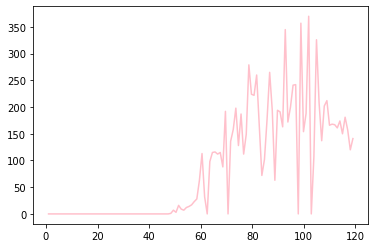

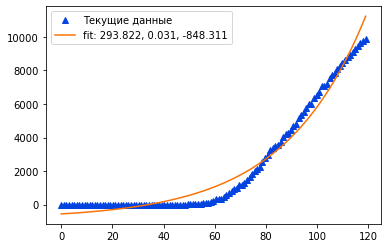

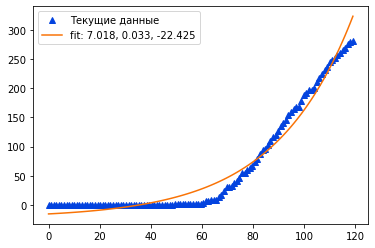

In [ ]:
#######№2#######
request = requests.get('https://pomber.github.io/covid19/timeseries.json').json()

confirmed = []
died =[]
                   
def exponenta(x, a, b, c):
        return a * np.exp(b * x) + c
        
def regression(x, y):
    popt, pcov = curve_fit(exponenta, x, y, p0 = (1, 0.01, 1), maxfev=50000)
    current = plt.plot(x, y, '^', color='xkcd:blue', label = "Текущие данные")
    curva_regresion = plt.plot(x, exponenta(x, *popt), color='xkcd:orange', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return exponenta(x, *popt)
      
print("Spread rate of infected \nHypothesis of an exponential increase in the number of confirmed \n Hypothesis of an exponential increase in the number of died")

for country in request:
    print(country)
    x = None
    requestCountry = request[country]
    x = np.linspace(0, len(requestCountry), len(requestCountry))
    x_distribution = []
    y_confirmed = []
    y_deaths = []
    y_distribution = []
    for d in requestCountry:
        if d != 0:
            y_confirmed.append(d['confirmed'])
            y_deaths.append(d['deaths'])
    for i in range(len(y_confirmed)):
        if i != len(y_confirmed)-1:
            y_distribution.append(y_confirmed[i+1] - y_confirmed[i])
    x_distribution = np.delete(x, 0) 
    pep = plt.plot(x_distribution, y_distribution, color='pink', label = "Spread")
    plt.show()
    mseConfirmed = mean_squared_error(y_confirmed, regression(x, y_confirmed))
    mseDied = mean_squared_error(y_deaths, regression(x, y_deaths))
    if mseConfirmed < 100:
        confirmed.append(country)
    if mseDied < 100:
        died.append(country)
print("Countries with the exponential growth of infection", confirmed)
print("\n")
print("Countries with the exponential growth of died", died)

In [11]:
#######№3#######
request = requests.get('https://pomber.github.io/covid19/timeseries.json').json()

population = requests.get('https://raw.githubusercontent.com/datasets/population/master/data/population.csv').text
listCodeOfCountries = requests.get('https://raw.githubusercontent.com/mledoze/countries/master/countries.json').json()

populationConfirmedPercent = [] 
populationDeathsPercent = []

for country in request:
    rows = csv.reader(population.split('\n'), delimiter=',')
    for list2 in listCodeOfCountries:
        if list2['name']['common'] == country or list2['name']['official'] == country:
            code = list2['cca3']
            for row in rows:
                if len(row) != 0:
                    if code == row[1]:
                        if "2018" == row[2]:
                            rs = request[country]
                            confirmed = []
                            deaths = []
                            for d in rs:
                                if d != 0:
                                    confirmed.append(d['confirmed'])
                                    deaths.append(d['deaths'])
                            k = float(confirmed[len(confirmed) - 1]) / float(row[3]) * 100
                            p = float(deaths[len(deaths)-1]) / float(row[3]) * 100
                            print("City:", country, " confirmed it percent: ", k)
                            populationConfirmedPercent.append([code, k])
                            print("City:", country, " died in percent: ", p)
                            populationDeathsPercent.append([code, p])
                            print("\n")

City: Afghanistan  confirmed it percent:  0.02058786325957123
City: Afghanistan  died in percent:  0.0004788500797339186


City: Albania  confirmed it percent:  0.03310800816082747
City: Albania  died in percent:  0.0010815050084148068


City: Algeria  confirmed it percent:  0.01746927407600221
City: Algeria  died in percent:  0.001328488919159176


City: Andorra  confirmed it percent:  0.9882346830117134
City: Andorra  died in percent:  0.06622860556320287


City: Angola  confirmed it percent:  0.00016877767507584123
City: Angola  died in percent:  9.737173562067764e-06


City: Antigua and Barbuda  confirmed it percent:  0.025964314645950604
City: Antigua and Barbuda  died in percent:  0.003115717757514073


City: Argentina  confirmed it percent:  0.01979795166602831
City: Argentina  died in percent:  0.0008832551940911711


City: Armenia  confirmed it percent:  0.1707785414611407
City: Armenia  died in percent:  0.0021681862038311853


City: Australia  confirmed it percent:  0.028307

City: Kuwait  confirmed it percent:  0.40519091032359444
City: Kuwait  died in percent:  0.002924606308109933


City: Kyrgyzstan  confirmed it percent:  0.01965901183020181
City: Kyrgyzstan  died in percent:  0.0002214208894793446


City: Latvia  confirmed it percent:  0.05251212397012413
City: Latvia  died in percent:  0.001089678461830639


City: Lebanon  confirmed it percent:  0.013929193267556587
City: Lebanon  died in percent:  0.00037962161945122774


City: Liberia  confirmed it percent:  0.004835051090719047
City: Liberia  died in percent:  0.00047727972140145094


City: Liechtenstein  confirmed it percent:  0.2163017673437088
City: Liechtenstein  died in percent:  0.0026378264310208386


City: Lithuania  confirmed it percent:  0.055754989304108486
City: Lithuania  died in percent:  0.002141676925894052


City: Luxembourg  confirmed it percent:  0.6510403816103298
City: Luxembourg  died in percent:  0.017929106012007565


City: Madagascar  confirmed it percent:  0.00124131989925

City: Timor-Leste  confirmed it percent:  0.0018927862760376413
City: Timor-Leste  died in percent:  0.0


City: Belize  confirmed it percent:  0.004698867833900243
City: Belize  died in percent:  0.0005220964259889159


City: Laos  confirmed it percent:  0.00026906437960055835
City: Laos  died in percent:  0.0


City: Libya  confirmed it percent:  0.0010181824933402628
City: Libya  died in percent:  4.4919815882658656e-05


City: Guinea-Bissau  confirmed it percent:  0.05538040952692432
City: Guinea-Bissau  died in percent:  0.0003201179741440712


City: Mali  confirmed it percent:  0.0047227940070312495
City: Mali  died in percent:  0.0002778114121783088


City: Saint Kitts and Nevis  confirmed it percent:  0.02860357353978757
City: Saint Kitts and Nevis  died in percent:  0.0


City: Botswana  confirmed it percent:  0.0011090773097865868
City: Botswana  died in percent:  4.436309239146348e-05


City: Burundi  confirmed it percent:  0.0003758262136636452
City: Burundi  died in percen

In [14]:
#######№4#######
from scipy.stats import linregress

request = requests.get('https://pomber.github.io/covid19/timeseries.json').json()

dataVVP = requests.get('https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv').text
income = requests.get('https://pastebin.com/raw/rruUUAJs').text

VVP = []
income2 = []
for country in request:
    rowsVVP = csv.reader(dataVVP.split('\n'), delimiter=',')
    for list2 in listCodeOfCountries:
        if list2['name']['common'] == country or list2['name']['official'] == country:
            code = list2['cca3']
            for row in rowsVVP:
                if len(row) != 0:
                    if code == row[1]:
                        if "2016" == row[2]:
                            VVP.append([code, row[3]])
            rows_income = csv.reader(income.split('\n'), delimiter=',')                
            for row in rows_income:
                if len(row) != 0:
                    if code == row[1]:
                        income2.append([code, row[2]])


x = []
y = []

def fun(x, y, first_array, second_array):
    for i in range(len(first_array)):
        for j in range(len(second_array)):
            if first_array[i][0] == second_array[j][0]:
                x.append(first_array[i][1])
                y.append(float(second_array[j][1]))
                return x, y
            
x, y = fun(x, y, populationConfirmedPercent, VVP)

if linregress(y, x)[2] < 0:
    print("Confirmed-VVP = Feedback")
else:
    print("Confirmed-VVP = Dirrect connection")

x = []
y = []

x, y = fun(x, y, populationDeathsPercent, VVP)

if linregress(y, x)[2] < 0:
    print("Died-VVP = Feedback")
else:
    print("Died-VVP = Direct connection")

x = []
y = []

x, y = fun(x, y, populationConfirmedPercent, income2)

if linregress(y, x)[2] < 0:
    print("Confirmed-income = Feedback")
else:
    print("Confirmed-income = Dirrect connection")
    
x = []
y = []

x, y = fun(x, y, populationDeathsPercent, income2)

if linregress(y, x)[2] < 0:
    print("Died-income = Feedback")
else:
    print("Died-income = Direct connection")
    

NameError: name 'res_code' is not defined

In [6]:
#######№5#######
# Create CSV-file and write it
import pandas as pd
import csv

x = []
y = []
z = []
for i in range(len(income2)):
    for j in range(len(populationConfirmedPercent)):
        if income2[i][0] == populationConfirmedPercent[j][0]:
            x.append(populationConfirmedPercent[j][1])
    for k in range(len(VVP)):
        if income2[i][0] == VVP[k][0]:
            y.append(VVP[k][1])
    z.append(income2[i][1])

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
points = []
z.pop()
x.pop()
for i in range(len(x)):
    points.append([x[i], y[i], z[i]])
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
y_km = kmeans.fit_predict(points)
rar = []
for i in range(len(income2)-1):
    rar.append([income2[i][0], y_km[i]])
            
data = [{'Country': ' ','Cluster': ' '}]

pd.DataFrame(data).to_csv(r'country.csv', index=False)

exampleFile = open('country.csv', 'w', encoding = 'UTF-8', newline = '')
exampleWriter = csv.writer(exampleFile, delimiter = ';')

p = [['Country,Cluster']]
for i in range(len(rar)):
    line = str(rar[i][0]) + ',' + str(rar[i][1])
    p.append([line])
    
for row in p:
    exampleWriter.writerow(row)

exampleFile.close()    

NameError: name 'income2' is not defined

In [8]:
import pandas as pd
import folium
import os

state_geo = os.path.join('world-countries.json')

state_unemployment = os.path.join('country.csv')
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[37, 0], zoom_start=2)
 
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['Country', 'Cluster'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Cluster'
)

folium.LayerControl().add_to(m)
 
display(m)

FileNotFoundError: File b'country.csv' does not exist

In [ ]:
#######№6#######

request = requests.get('https://pomber.github.io/covid19/timeseries.json').json()

def fsigm(x, a, b, c, d):
    return a / (b+np.exp(c * (x+d)))
  
def sigm (x_data, y_data):
    popt, pcov = curve_fit(fsigm, x_data, y_data, p0 = (0, 0, 0, 0), maxfev=10000)
    plt.plot(x_data, y_data, 'o', color='pink', label = "Current")
    plt.plot(np.arange(1, len(x_data)+200), fsigm(np.arange(1, len(y_data)+200), *popt), '--', color='orange',label = "Future")
    
    plt.legend()
    plt.show()

for country in request:
    resC = request[country]
    x = np.linspace(1, len(resC), len(resC))
y = [0 for i in range(len(x))]
for country in request:
    resC = request[country]
    i = 0
    for d in resC:
        if d != 0:
            y[i] += (d['confirmed'])
            i += 1
print("Global")
sigm(x, y)

for country in request:
    resC = request[country]
    x = np.linspace(1, len(resC), len(resC))
    y = []
    for d in resC:
        if d != 0:
            y.append(d['confirmed'])
    print("Country", country)
    sigm(x,y)
    
